# *Proyecto Integrador - Modulo 4 - Presa Germán A.*
        Expansión Estratégica de Biogenesys con Python

## *Avance N° 1*

### 1.1 Importacion de Librerias a utilizar.

In [2]:
# Importar librerías necesarias 

import pandas as pd
import numpy as np

### 1.2 Lectura del archivo data_latinoamerica.csv

In [3]:
# Ruta al archivo CSV

data_latinoamerica = r'C:\Users\Lenovo\Documents\henry da-ft10\python\DA_PI_M4_Presa_German\data_latinoamerica.csv'

# Leer el archivo CSV y convertir la columna "date" en tipo fecha

df_datalatinoamerica = pd.read_csv(data_latinoamerica,parse_dates=['date'])

# Mostrar las primeras filas del dataframe para verificar su contenido

print(df_datalatinoamerica.head())

  location_key       date country_code country_name  new_confirmed  \
0           AR 2020-01-01           AR    Argentina            3.0   
1           AR 2020-01-02           AR    Argentina           14.0   
2           AR 2020-01-03           AR    Argentina            3.0   
3           AR 2020-01-04           AR    Argentina            7.0   
4           AR 2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                      

### 1.3 Comprobacion de la cantidad de registros y columnas especificadas

In [4]:
# Comprobar la cantidad de registros y columnas

num_registros, num_columnas = df_datalatinoamerica.shape  # df.shape devuelve (filas, columnas)

print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de columnas: {num_columnas}")


Cantidad de registros: 12216057
Cantidad de columnas: 50


### 1.4 Selección de los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

In [5]:
# Lista de paises completa

paises = df_datalatinoamerica['country_name'].unique()

# Mostrar los valores únicos uno debajo del otro
for valor in paises:
    print(valor)

Argentina
Bolivia
Brazil
Chile
Colombia
Costa Rica
Cuba
Dominican Republic
Ecuador
Guatemala
Honduras
Mexico
Nicaragua
Panama
Peru
Puerto Rico
Paraguay
El Salvador
Uruguay
Venezuela


In [6]:
# Lista de paises a seleccionados

paises_seleccionados = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

# Filtrar el dataframe para incluir unicamente los países seleccionados

df_paises_seleccionados = df_datalatinoamerica[df_datalatinoamerica['country_name'].isin(paises_seleccionados)]

# Mostrar el dataframe filtrado

print(df_paises_seleccionados)

         location_key       date country_code country_name  new_confirmed  \
0                  AR 2020-01-01           AR    Argentina            3.0   
1                  AR 2020-01-02           AR    Argentina           14.0   
2                  AR 2020-01-03           AR    Argentina            3.0   
3                  AR 2020-01-04           AR    Argentina            7.0   
4                  AR 2020-01-05           AR    Argentina            5.0   
...               ...        ...          ...          ...            ...   
12136772  PE_UCA_0401 2022-09-13           PE         Peru            NaN   
12136773  PE_UCA_0401 2022-09-14           PE         Peru            NaN   
12136774  PE_UCA_0401 2022-09-15           PE         Peru            NaN   
12136775  PE_UCA_0401 2022-09-16           PE         Peru            NaN   
12136776  PE_UCA_0401 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0     

se redujeron los datos de 12.5M en 12M

### 1.5 Filtrado de los datos en fechas mayores a 2021-01-01.

In [7]:
# Filtrar el dataframe para incluir solo las fechas mayores a 2021-01-01

df_paises_seleccionados_fechas = df_paises_seleccionados[df_paises_seleccionados['date'] >= '2021-01-01']

# Mostrar el dataframe filtrado

print(df_paises_seleccionados_fechas)

         location_key       date country_code country_name  new_confirmed  \
366                AR 2021-01-01           AR    Argentina         2685.0   
367                AR 2021-01-02           AR    Argentina         7767.0   
368                AR 2021-01-03           AR    Argentina         4934.0   
369                AR 2021-01-04           AR    Argentina        13953.0   
370                AR 2021-01-05           AR    Argentina        14085.0   
...               ...        ...          ...          ...            ...   
12136772  PE_UCA_0401 2022-09-13           PE         Peru            NaN   
12136773  PE_UCA_0401 2022-09-14           PE         Peru            NaN   
12136774  PE_UCA_0401 2022-09-15           PE         Peru            NaN   
12136775  PE_UCA_0401 2022-09-16           PE         Peru            NaN   
12136776  PE_UCA_0401 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
366   

se redujeron los datos de 12M a 7.5M

### 1.6 Limpieza preliminar de datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario.

In [8]:
# Mostrar los tipos de datos de cada columna

tipo_de_datos = df_paises_seleccionados_fechas.dtypes

# Imprimir los tipos de datos

print(tipo_de_datos)

location_key                                     object
date                                     datetime64[ns]
country_code                                     object
country_name                                     object
new_confirmed                                   float64
new_deceased                                    float64
cumulative_confirmed                            float64
cumulative_deceased                             float64
cumulative_vaccine_doses_administered           float64
population                                      float64
population_male                                 float64
population_female                               float64
population_rural                                float64
population_urban                                float64
population_density                              float64
human_development_index                         float64
population_age_00_09                            float64
population_age_10_19                            

#### 1.6.1 Verificación de cantidad de nulos

In [9]:
# Verifiacion de cantidad de nulos por columna

nulos_por_columna = df_paises_seleccionados_fechas.isnull().sum() 
nulos_por_columna[nulos_por_columna > 0] #llamamos los valores nulos que hay en el data set

new_confirmed                            3164800
new_deceased                             3167470
cumulative_confirmed                     3164800
cumulative_deceased                      3167470
cumulative_vaccine_doses_administered    7286122
population                                328750
population_male                           708125
population_female                         708125
population_rural                         7545625
population_urban                         7545625
population_density                       7545625
human_development_index                  4081875
population_age_00_09                      924375
population_age_10_19                      924375
population_age_20_29                      924375
population_age_30_39                      924375
population_age_40_49                      924375
population_age_50_59                      924375
population_age_60_69                      924375
population_age_70_79                      924375
population_age_80_an

#### 1.6.2 Eliminacion de filas y columnas totalmente nulas

In [10]:
# Elimino cualquier fila o columna que contenga todos sus valores nulos.

df_paises_seleccionados_fechas.dropna(axis = 0, how = 'all')
df_paises_seleccionados_fechas.dropna(axis = 1, how = 'all')

# Verifiacion de cantidad de nulos por columna

nulos_por_columna = df_paises_seleccionados_fechas.isnull().sum() 
nulos_por_columna[nulos_por_columna > 0] #llamamos los valores nulos que hay en el data set

new_confirmed                            3164800
new_deceased                             3167470
cumulative_confirmed                     3164800
cumulative_deceased                      3167470
cumulative_vaccine_doses_administered    7286122
population                                328750
population_male                           708125
population_female                         708125
population_rural                         7545625
population_urban                         7545625
population_density                       7545625
human_development_index                  4081875
population_age_00_09                      924375
population_age_10_19                      924375
population_age_20_29                      924375
population_age_30_39                      924375
population_age_40_49                      924375
population_age_50_59                      924375
population_age_60_69                      924375
population_age_70_79                      924375
population_age_80_an

#### 1.6.3 Filtrado de subregiones de cada país

In [11]:
# analizando 'location_key', se nota que 'AR' agrupa valor del subgrupo 'AR_xx' que a su vez agrupa valores de otro subgrupo 'AR_xx_123'
# Por esa razon se utilizara unicamente los 'country_code'

# Lista de country_code a filtrar

filtro_code = df_paises_seleccionados_fechas['country_code'].unique().tolist()

filtro_code

['AR', 'BR', 'CL', 'CO', 'MX', 'PE']

In [12]:
# Filtrar el DataFrame para incluir solo los países especificados en la lista de 'filtro_code'

df_paises_seleccionados_fechas = df_paises_seleccionados_fechas[df_paises_seleccionados_fechas['location_key'].isin(filtro_code)]

# Mostrar la forma (número de filas y columnas) del DataFrame filtrado

df_paises_seleccionados_fechas.shape

(3750, 50)

se redujeron los datos de 7.5M a 3.7k

In [13]:
# Verifiacion de cantidad de nulos por columna

nulos_por_columna = df_paises_seleccionados_fechas.isnull().sum() 
nulos_por_columna[nulos_por_columna > 0] #llamamos los valores nulos que hay en el data set

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2119
cumulative_recovered                     2740
dtype: int64

#### 1.6.4 Eliminación de columnas con mas del 80% de valores nulos

In [14]:
# Verificar cuántos valores nulos hay en cada columna

nulos_por_dato = df_paises_seleccionados_fechas.isnull().sum()

# Obtener la cantidad total de registros
total_registros = len(df_paises_seleccionados_fechas)

# Mostrar solo las columnas que tienen valores nulos y la cantidad de registros
resultados_nulos = nulos_por_dato[nulos_por_dato > 0]

# Crear un DataFrame con la cantidad de nulos y el porcentaje de registros nulos
df_resultados_nulos = pd.DataFrame({
    'Valores nulos': resultados_nulos,
    'Total registros': total_registros,
    'Porcentaje nulos': (resultados_nulos / total_registros) * 100
})

print(df_resultados_nulos)

                                       Valores nulos  Total registros  \
new_confirmed                                     21             3750   
new_deceased                                      21             3750   
cumulative_confirmed                              21             3750   
cumulative_deceased                               21             3750   
cumulative_vaccine_doses_administered            589             3750   
average_temperature_celsius                       42             3750   
minimum_temperature_celsius                       41             3750   
maximum_temperature_celsius                       41             3750   
rainfall_mm                                       90             3750   
relative_humidity                                 42             3750   
new_recovered                                   2119             3750   
cumulative_recovered                            2740             3750   

                                       Porcentaje 

In [15]:
# Se decide eliminar columnas que tienen mas del 80% de datos nulos.

# Lista de columnas con porcentaje de nulos mayor a 80%

columnas_nulos_80 = df_resultados_nulos[df_resultados_nulos['Porcentaje nulos'] > 80]

print(columnas_nulos_80.iloc[:, [2]])

print(f"Número de columnas a eliminar: {len(columnas_nulos_80)}")



Empty DataFrame
Columns: [Porcentaje nulos]
Index: []
Número de columnas a eliminar: 0


In [16]:
# Creo una lista con solo el indice de las columnas a eliminar, para realizar el drop

columnas_eliminar_nulos = list(columnas_nulos_80.index)

print(columnas_eliminar_nulos)


[]


In [17]:
# Eliminacion de columnas seleccionadas

df_paises_seleccionados_fechas = df_paises_seleccionados_fechas.drop(columns=columnas_eliminar_nulos)

# Verificar el resultado

print(f"Número de columnas eliminadas: {len(columnas_eliminar_nulos)}")
print(f"Número de columnas restantes: {df_paises_seleccionados_fechas.shape[1]}")

Número de columnas eliminadas: 0
Número de columnas restantes: 50


In [18]:
nulos_por_columna = df_paises_seleccionados_fechas.isnull().sum() #
nulos_restantes=nulos_por_columna[nulos_por_columna > 0] #llamamos los valores nulos que hay en el data set
nulos_restantes


new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2119
cumulative_recovered                     2740
dtype: int64

#### 1.6.5 Tratamiento de columnas acumulativas

In [19]:
''' los valores:

cumulative_confirmed
cumulative_deceased
cumulative_vaccine_doses_administered
cumulative_recovered

son acumulativos, por lo que se tomara el anterior NO NULO a cada nulo, y se le sumará el "new" correspondiente '''

# Asegurar que los datos estén ordenados por país y fecha
df_paises_seleccionados_fechas.sort_values(by=['country_name', 'date'], inplace=True)

# Columnas acumulativas y sus correspondientes "new"
nulos_acumulativas = [
    'cumulative_confirmed',
    'cumulative_deceased',
    'cumulative_vaccine_doses_administered',
    'cumulative_recovered'
]

# Filtrar las columnas acumulativas que son numéricas
columnas_numericas_acumulativas = [
    columna for columna in nulos_acumulativas
    if columna in df_paises_seleccionados_fechas.select_dtypes(include=['number']).columns
]

# Iterar por país
for pais, grupo in df_paises_seleccionados_fechas.groupby('country_name'):
    # Asegurar que los datos del grupo estén ordenados por fecha
    grupo = grupo.sort_values(by='date')
    
    # Iterar sobre las columnas acumulativas
    for columna in columnas_numericas_acumulativas:
        # Determinar la columna asociada "new"
        columna_new = 'new_' + columna.replace('cumulative_', '')

        # Verificar que la columna "new" exista
        if columna_new in df_paises_seleccionados_fechas.columns:
            # Iterar sobre las filas del grupo actual
            for idx, fila in grupo.iterrows(): # iterrows(): Permite recorrer cada fila del grupo como una serie (fila) y devuelve una tupla
                # Si el valor acumulativo es nulo
                if pd.isnull(fila[columna]):
                    # Buscar el valor acumulativo anterior (no nulo)
                    valor_anterior = grupo.loc[:idx, columna].ffill().iloc[-1] or 0 #Para buscar el valor no nulo más cercano hacia atrás

                    # Sumar el valor "new" correspondiente (manejar nulos como 0)
                    valor_nuevo = fila[columna_new] if not pd.isnull(fila[columna_new]) else 0

                    # Actualizar el valor acumulativo
                    df_paises_seleccionados_fechas.loc[idx, columna] = valor_anterior + valor_nuevo

# Verificar resultados
print(df_paises_seleccionados_fechas[columnas_numericas_acumulativas].isnull().sum())


cumulative_confirmed                        0
cumulative_deceased                         0
cumulative_vaccine_doses_administered     589
cumulative_recovered                     2500
dtype: int64


Explicación Paso a Paso
    1- Ordenar los Datos por País y Fecha:

Es esencial trabajar con datos en un orden cronológico para garantizar que al buscar el valor anterior, se hace de manera coherente.

    2- Definir la Columna new:

Cada columna acumulativa tiene una columna asociada de "new" que representa los nuevos valores del día. Por ejemplo, cumulative_confirmed tiene su correspondiente new_confirmed.

    3- Iterar por País:

Se procesan los datos país por país para evitar confusiones entre registros de diferentes países.

    4-Iterar por Índices del País:

Dentro de cada grupo de país, se itera por cada fila para verificar y rellenar los valores nulos.

    5-Buscar Valor Anterior Válido:

Si el valor en la columna acumulativa es nulo, se busca hacia atrás en los datos del país para encontrar el último valor no nulo. Si no se encuentra ninguno, se inicializa con 0.

    6-Actualizar el Valor Acumulativo:

Se calcula el nuevo valor acumulativo como la suma del valor anterior y el correspondiente en la columna "new".

    7-Verificar los Resultados:

Al final, se imprime la cantidad de valores nulos restantes en las columnas acumulativas para confirmar que el proceso fue exitoso.

Posibles Escenarios Especiales
No Hay Valores Anteriores: El código maneja este caso inicializando con 0.
Valores Nulos en la Columna new: Si new_confirmed (o similar) es nulo, se asume un valor de 0 en lugar de propagar el nulo.

In [20]:
nulos_por_columna = df_paises_seleccionados_fechas.isnull().sum() #
nulos_restantes=nulos_por_columna[nulos_por_columna > 0] #llamamos los valores nulos que hay en el data set
nulos_restantes

new_confirmed                              21
new_deceased                               21
cumulative_vaccine_doses_administered     589
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2119
cumulative_recovered                     2500
dtype: int64

In [21]:
# visualizacion del df para exploracion

df_paises_seleccionados_fechas

location_key       date country_code country_name  new_confirmed  \
366                AR 2021-01-01           AR    Argentina         2685.0   
367                AR 2021-01-02           AR    Argentina         7767.0   
368                AR 2021-01-03           AR    Argentina         4934.0   
369                AR 2021-01-04           AR    Argentina        13953.0   
370                AR 2021-01-05           AR    Argentina        14085.0   
...               ...        ...          ...          ...            ...   
10253872           PE 2022-09-13           PE         Peru         1150.0   
10253873           PE 2022-09-14           PE         Peru            NaN   
10253874           PE 2022-09-15           PE         Peru            NaN   
10253875           PE 2022-09-16           PE         Peru            NaN   
10253876           PE 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
366              140.0             1662867.0              46522.0   
367              166.0             1670634.0              46688.0   
368              157.0             1675568.0              46845.0   
369              157.0             1689521.0              47002.0   
370              160.0             1703606.0              47162.0   
...                ...                   ...                  ...   
10253872          22.0             4127612.0             216173.0   
10253873           NaN             4127612.0             216173.0   
10253874           NaN             4127612.0             216173.0   
10253875           NaN             4127612.0             216173.0   
10253876           NaN             4127612.0             216173.0   

          cumulative_vaccine_doses_administered  population  ...  \
366                                     18849.0  44938712.0  ...   
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    NaN  29381884.0  ...   
10253873                                    NaN  29381884.0  ...   
10253874                                    NaN  29381884.0  ...   
10253875                                    NaN  29381884.0  ...   
10253876                                    NaN  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
366                    15057273.0         2690269.0           55032.0   
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
366                76.520                    147.086   
367                76.520                    147.086   
368                76.520                    147.086   
369                76.520                    147.086   
370                76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    146.370   
1

#### 1.6.6 Analisis de metodos a aplicar en nulos

In [22]:
nulos_analizar=['new_confirmed', 
'new_deceased', 
'average_temperature_celsius',
'minimum_temperature_celsius',
'maximum_temperature_celsius',
'rainfall_mm',
'relative_humidity',
'new_recovered']

nulos_analizar

columnas_numericas = [
    columna for columna in nulos_analizar
    if columna in df_datalatinoamerica.select_dtypes(include=['number']).columns]

columnas_numericas

['new_confirmed',
 'new_deceased',
 'average_temperature_celsius',
 'minimum_temperature_celsius',
 'maximum_temperature_celsius',
 'rainfall_mm',
 'relative_humidity',
 'new_recovered']

In [23]:
# calculo de outliers agrupando los datos por paises
# el porcentatje ayudara a seleccionar el metodo de llenado de nulos

# nulos a analizar que metodo aplicar:
nulos_analizar=['new_confirmed', 
'new_deceased', 
'average_temperature_celsius',
'minimum_temperature_celsius',
'maximum_temperature_celsius',
'rainfall_mm',
'relative_humidity',
'new_recovered']

# seleccion de las columnas numericas a iterar
columnas_numericas = [
    columna for columna in nulos_analizar
    if columna in df_datalatinoamerica.select_dtypes(include=['number']).columns]

# Crear una lista para almacenar los resultados
outlier_recomendaciones = []

# Agrupar por el país (supongamos que la columna de países es 'country_code')
for pais, grupo in df_paises_seleccionados_fechas.groupby('country_code'):
    # Iterar sobre las columnas numéricas
    for columna in columnas_numericas:
        Q1 = grupo[columna].quantile(0.25)
        Q3 = grupo[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = grupo[
            (grupo[columna] < Q1 - 1.5 * IQR) |
            (grupo[columna] > Q3 + 1.5 * IQR)
        ]
        
        # Calcular métricas
        num_outliers = len(outliers)
        porcentaje_outliers = (num_outliers / len(grupo)) * 100
        
        # Decidir recomendación
        if porcentaje_outliers < 5:
            recomendacion = "Usar media"
        elif porcentaje_outliers < 15:
            recomendacion = "Evaluar según contexto"
        else:
            recomendacion = "Usar mediana"
        
        # Agregar los resultados a la lista
        outlier_recomendaciones.append({
            "pais": pais,
            "columna": columna,
            "Q1": Q1,
            "Q3": Q3,
            "num_outliers": num_outliers,
            "porcentaje_outliers": porcentaje_outliers,
            "recomendacion": recomendacion
        })

# Convertir la lista en un DataFrame de pandas
recomendaciones_por_pais = pd.DataFrame(outlier_recomendaciones)

# Mostrar la tabla
print(recomendaciones_por_pais)


   pais                      columna            Q1            Q3  \
0    AR                new_confirmed   1235.000000  14294.000000   
1    AR                 new_deceased      8.000000    187.000000   
2    AR  average_temperature_celsius     12.114197     22.484876   
3    AR  minimum_temperature_celsius      3.540123     15.112345   
4    AR  maximum_temperature_celsius     21.151235     30.008024   
5    AR                  rainfall_mm      0.000000      0.904875   
6    AR            relative_humidity     47.473150     66.571098   
7    AR                new_recovered           NaN           NaN   
8    BR                new_confirmed  14413.500000  62609.500000   
9    BR                 new_deceased    165.500000   1149.000000   
10   BR  average_temperature_celsius     26.305556     29.422222   
11   BR  minimum_temperature_celsius     20.922222     24.000000   
12   BR  maximum_temperature_celsius     31.500000     34.575000   
13   BR                  rainfall_mm      0.0000

#### 1.6.7 Aplicación de media o mediana

In [24]:
# Aplico media o mediana segun analisis previo

# Agrupar por el país (supongamos que la columna de países es 'country_code')
for pais, grupo in df_paises_seleccionados_fechas.groupby('country_code'):
    # Iterar sobre las columnas numéricas
    for columna in columnas_numericas:
        # Buscar la recomendación previamente calculada
        recomendacion = recomendaciones_por_pais[
            (recomendaciones_por_pais['pais'] == pais) & (recomendaciones_por_pais['columna'] == columna)
        ]['recomendacion'].values[0]
        
        # Imputar valores nulos según la recomendación
        if recomendacion == "Usar mediana":
            # Calcular la mediana
            mediana = grupo[columna].median()
            # Reemplazar valores nulos con la mediana
            df_paises_seleccionados_fechas.loc[grupo.index, columna] = grupo[columna].fillna(mediana)
        elif recomendacion == "Usar media":
            # Calcular la media
            media = grupo[columna].mean()
            # Reemplazar valores nulos con la media
            df_paises_seleccionados_fechas.loc[grupo.index, columna] = grupo[columna].fillna(media)
        else:
            # No hacer nada si la recomendación es evaluar según contexto
            # Deja los valores nulos sin cambios
            pass

# Mostrar el DataFrame con los valores imputados
print(df_paises_seleccionados_fechas)


         location_key       date country_code country_name  new_confirmed  \
366                AR 2021-01-01           AR    Argentina    2685.000000   
367                AR 2021-01-02           AR    Argentina    7767.000000   
368                AR 2021-01-03           AR    Argentina    4934.000000   
369                AR 2021-01-04           AR    Argentina   13953.000000   
370                AR 2021-01-05           AR    Argentina   14085.000000   
...               ...        ...          ...          ...            ...   
10253872           PE 2022-09-13           PE         Peru    1150.000000   
10253873           PE 2022-09-14           PE         Peru    5025.251208   
10253874           PE 2022-09-15           PE         Peru    5025.251208   
10253875           PE 2022-09-16           PE         Peru    5025.251208   
10253876           PE 2022-09-17           PE         Peru    5025.251208   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
366   

In [25]:
nulos_por_columna = df_paises_seleccionados_fechas.isnull().sum() #
nulos_por_columna[nulos_por_columna > 0] #llamamos los valores nulos que hay en el data set

new_confirmed                              11
new_deceased                                9
cumulative_vaccine_doses_administered     589
average_temperature_celsius                14
minimum_temperature_celsius                13
rainfall_mm                                47
new_recovered                            1875
cumulative_recovered                     2500
dtype: int64

In [26]:
# Se decide aplicar la mediana ya que no es sensible a los valores extremos

for column in df_paises_seleccionados_fechas.select_dtypes(include=['float64', 'int64']).columns:
    
    df_paises_seleccionados_fechas.loc[df_paises_seleccionados_fechas[column].isnull(), column] = df_paises_seleccionados_fechas.groupby('country_name')[column].transform('median')

In [27]:
# Verificar cuántos valores nulos hay en cada columna

nulos_por_columna = df_paises_seleccionados_fechas.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos

nulos_por_columna[nulos_por_columna > 0]

new_recovered           1875
cumulative_recovered    2500
dtype: int64

In [28]:
# al haber 4 paises sin informacion, se considera que no seria nutritivo para el analisis rellenar los nulos con valores ficticios, por lo que se dejaran en cero
# se analizará al avanzar el proyecto si es ascencial realizarlo

In [29]:
# Reemplazar todos los valores nulos por 0
df_paises_seleccionados_fechas.fillna(0, inplace=True)

In [30]:
# Verificar cuántos valores nulos hay en cada columna

nulos_por_columna = df_paises_seleccionados_fechas.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos

nulos_por_columna[nulos_por_columna > 0]

Series([], dtype: int64)

### 1.7. Examinación de las caracteristicas basicas del dataset e identificacion de las variables que son claves para tu análisis.

In [31]:
# Mostrar información general (tipos de datos, valores nulos)
print(df_paises_seleccionados_fechas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3750 entries, 366 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3750 non-null   object        
 1   date                                   3750 non-null   datetime64[ns]
 2   country_code                           3750 non-null   object        
 3   country_name                           3750 non-null   object        
 4   new_confirmed                          3750 non-null   float64       
 5   new_deceased                           3750 non-null   float64       
 6   cumulative_confirmed                   3750 non-null   float64       
 7   cumulative_deceased                    3750 non-null   float64       
 8   cumulative_vaccine_doses_administered  3750 non-null   float64       
 9   population                             3750 non-null   float64

In [32]:
# valiables consideradas claves para el analisis
variables_covid = ['new_confirmed', 'new_recovered', 'new_deceased', 'cumulative_confirmed', 'cumulative_recovered', 'cumulative_deceased', 'population', 'population_density']

# Obtener estadísticas descriptivas de las variables

print(df_paises_seleccionados_fechas[variables_covid].describe())

       new_confirmed  new_recovered  new_deceased  cumulative_confirmed  \
count    3750.000000    3750.000000   3750.000000          3.750000e+03   
mean    13896.279689    8948.839282    276.465577          6.786495e+06   
std     24207.394803   22959.641599    506.957438          8.001193e+06   
min      -573.000000  -31119.000000      0.000000          9.710000e+02   
25%      1538.250000       0.000000     26.000000          2.130490e+06   
50%      5152.500000       0.000000     99.000000          3.640786e+06   
75%     14827.750000    9292.250000    312.750000          6.247634e+06   
max    298408.000000  282957.000000  11447.000000          3.456883e+07   

       cumulative_recovered  cumulative_deceased    population  \
count          3.750000e+03          3750.000000  3.750000e+03   
mean           4.261162e+06        192863.569600  7.772147e+07   
std            8.398261e+06        182912.085588  6.713774e+07   
min            0.000000e+00             1.000000  1.757400e+

In [33]:
# Mostrar las primeras filas para entender la estructura de los datos
print(df_paises_seleccionados_fechas[variables_covid].head())


     new_confirmed  new_recovered  new_deceased  cumulative_confirmed  \
366         2685.0            0.0         140.0             1662867.0   
367         7767.0            0.0         166.0             1670634.0   
368         4934.0            0.0         157.0             1675568.0   
369        13953.0            0.0         157.0             1689521.0   
370        14085.0            0.0         160.0             1703606.0   

     cumulative_recovered  cumulative_deceased  population  population_density  
366                   0.0              46522.0  44938712.0              16.515  
367                   0.0              46688.0  44938712.0              16.515  
368                   0.0              46845.0  44938712.0              16.515  
369                   0.0              47002.0  44938712.0              16.515  
370                   0.0              47162.0  44938712.0              16.515  


In [34]:
# Mostrar información general (tipos de datos, valores nulos)

print(df_paises_seleccionados_fechas[variables_covid].info())

<class 'pandas.core.frame.DataFrame'>
Index: 3750 entries, 366 to 10253876
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   new_confirmed         3750 non-null   float64
 1   new_recovered         3750 non-null   float64
 2   new_deceased          3750 non-null   float64
 3   cumulative_confirmed  3750 non-null   float64
 4   cumulative_recovered  3750 non-null   float64
 5   cumulative_deceased   3750 non-null   float64
 6   population            3750 non-null   float64
 7   population_density    3750 non-null   float64
dtypes: float64(8)
memory usage: 392.7 KB
None


In [35]:
# Resumen estadístico de las variables numéricas (media, desviación estándar, percentiles)
print(df_paises_seleccionados_fechas[variables_covid].describe())


       new_confirmed  new_recovered  new_deceased  cumulative_confirmed  \
count    3750.000000    3750.000000   3750.000000          3.750000e+03   
mean    13896.279689    8948.839282    276.465577          6.786495e+06   
std     24207.394803   22959.641599    506.957438          8.001193e+06   
min      -573.000000  -31119.000000      0.000000          9.710000e+02   
25%      1538.250000       0.000000     26.000000          2.130490e+06   
50%      5152.500000       0.000000     99.000000          3.640786e+06   
75%     14827.750000    9292.250000    312.750000          6.247634e+06   
max    298408.000000  282957.000000  11447.000000          3.456883e+07   

       cumulative_recovered  cumulative_deceased    population  \
count          3.750000e+03          3750.000000  3.750000e+03   
mean           4.261162e+06        192863.569600  7.772147e+07   
std            8.398261e+06        182912.085588  6.713774e+07   
min            0.000000e+00             1.000000  1.757400e+

In [36]:
# Resumen estadístico de las variables numéricas (media, desviación estándar, percentiles) por pais
estadistico_paises = df_paises_seleccionados_fechas.groupby('country_name')[variables_covid].describe()
estadistico_paises

new_confirmed                                              \
                     count          mean           std    min      25%   
country_name                                                             
Argentina            625.0  12845.504000  23516.869801    0.0   1239.0   
Brazil               625.0  43166.709470  39518.757267 -573.0  14423.0   
Chile                625.0   6093.043200   6789.457428  273.0   1932.0   
Colombia             625.0   7403.602254   9215.255107    0.0    365.0   
Mexico               625.0   8843.568000  12006.420915  192.0   2116.0   
Peru                 625.0   5025.251208   7993.534763    0.0    944.0   

                                         new_recovered                ...  \
                  50%      75%       max         count          mean  ...   
country_name                                                          ...   
Argentina      5174.0  14269.0  174174.0         625.0      0.000000  ...   
Brazil        32572.0  62504.0  298408.0         625.0  43405.868167  ...   
Chile          4208.0   7533.0   38446.0         625.0      0.000000  ...   
Colombia       2594.0  12645.0   40415.0         625.0  10287.167526  ...   
Mexico         4215.0  10340.0   81002.0         625.0      0.000000  ...   
Peru           2244.0   6609.0   58128.0         625.0      0.000000  ...   

               population              population_density          \
                      75%          max              count    mean   
country_name                                                        
Argentina      44938712.0   44938712.0              625.0  16.515   
Brazil        212559409.0  212559409.0              625.0  25.431   
Chile          17574003.0   17574003.0              625.0  25.710   
Colombia       50882884.0   50882884.0              625.0  45.861   
Mexico        110991953.0  110991953.0              625.0  66.325   
Peru           29381884.0   29381884.0              625.0  25.759   

                                                                    
                       std     min     25%     50%     75%     max  
country_name                                                        
Argentina     0.000000e+00  16.515  16.515  16.515  16.515  16.515  
Brazil        3.555559e-15  25.431  25.431  25.431  25.431  25.431  
Chile         3.555559e-15  25.710  25.710  25.710  25.710  25.710  
Colombia      0.000000e+00  45.861  45.861  45.861  45.861  45.861  
Mexico        0.000000e+00  66.325  66.325  66.325  66.325  66.325  
Peru          7.111119e-15  25.759  25.759  25.759  25.759  25.759  

[6 rows x 64 columns]

In [37]:
# visualizar info detallada de las columnas con nulos
# Agrupar por country_code y seleccionar las columnas deseadas
ultimos_nulos = df_paises_seleccionados_fechas.groupby('country_code')[['new_recovered', 'cumulative_recovered']].describe()

ultimos_nulos

new_recovered                                                \
                     count          mean           std      min      25%   
country_code                                                               
AR                   625.0      0.000000      0.000000      0.0      0.0   
BR                   625.0  43405.868167  39957.907043 -31119.0  16767.0   
CL                   625.0      0.000000      0.000000      0.0      0.0   
CO                   625.0  10287.167526   7657.457824     17.0   4354.0   
MX                   625.0      0.000000      0.000000      0.0      0.0   
PE                   625.0      0.000000      0.000000      0.0      0.0   

                                              cumulative_recovered  \
                       50%      75%       max                count   
country_code                                                         
AR                0.000000      0.0       0.0                625.0   
BR            33894.000000  59815.0  282957.0                625.0   
CL                0.000000      0.0       0.0                625.0   
CO            10287.167526  10401.0   61030.0                625.0   
MX                0.000000      0.0       0.0                625.0   
PE                0.000000      0.0       0.0                625.0   

                                                                             \
                      mean           std        min         25%         50%   
country_code                                                                  
AR            0.000000e+00  0.000000e+00        0.0         0.0         0.0   
BR            2.121751e+07  7.829728e+06  6747065.0  15290500.0  21100888.0   
CL            0.000000e+00  0.000000e+00        0.0         0.0         0.0   
CO            4.349466e+06  1.308673e+06  1461223.0   3281771.0   4860542.0   
MX            0.000000e+00  0.000000e+00        0.0         0.0         0.0   
PE            0.000000e+00  0.000000e+00        0.0         0.0         0.0   

                                      
                     75%         max  
country_code                          
AR                   0.0         0.0  
BR            29191158.0  33706231.0  
CL                   0.0         0.0  
CO             5441021.0   5441021.0  
MX                   0.0         0.0  
PE                   0.0         0.0

### 1.8. Guardado de los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv

In [38]:
# Guardar los datos filtrados en un archivo CSV

df_paises_seleccionados_fechas.to_csv('DatosFinalesFiltrado.csv', index=False, sep=';')

print("Los datos filtrados se han guardado correctamente en 'DatosFinalesFiltrado.csv'.")

Los datos filtrados se han guardado correctamente en 'DatosFinalesFiltrado.csv'.


In [39]:
df = pd.read_csv('DatosFinalesFiltrado.csv', sep = ';')

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Lee el archivo CSV con el delimitador especificado
df = pd.read_csv('DatosFinalesFiltrado.csv', sep=';')

# convierte date en fecha
df['date'] = pd.to_datetime(df['date'])

In [41]:
print(df.dtypes)

location_key                                     object
date                                     datetime64[ns]
country_code                                     object
country_name                                     object
new_confirmed                                   float64
new_deceased                                    float64
cumulative_confirmed                            float64
cumulative_deceased                             float64
cumulative_vaccine_doses_administered           float64
population                                      float64
population_male                                 float64
population_female                               float64
population_rural                                float64
population_urban                                float64
population_density                              float64
human_development_index                         float64
population_age_00_09                            float64
population_age_10_19                            

### 1.9. Aplicación de bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default.

In [42]:
# Extraer los nombres de las columnas a una lista
lista_columnas_num = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Mostrar la lista de nombres de columnas
print("Columnas numéricas:", lista_columnas_num)


Columnas numéricas: ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density', 'human_development_index', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate', 'pollution_mortality_rate', 'como

In [43]:
# Diccionario para guardar resultados

estadistica = {}

# Calcular estadísticas descriptivas para cada columna numérica
for columna in lista_columnas_num:
    estadistica[columna] = {
        'mean': df[columna].mean(),
        'median': df[columna].median(),
        'std': df[columna].std(),
        'min': df[columna].min(),
        'max': df[columna].max(),
        'count': df[columna].count(),
        'Q1': df[columna].quantile(0.25),
        'Q2': df[columna].quantile(0.50),
        'Q3': df[columna].quantile(0.75)
    }

# Mostrar los resultados
for columna, valores in estadistica.items():
    print(f"Estadísticas para la columna '{columna}':")
    for estadistica, valor in valores.items():
        print(f"  {estadistica}: {valor}")
    print("\n")


Estadísticas para la columna 'new_confirmed':
  mean: 13896.279688743798
  median: 5152.5
  std: 24207.3948028122
  min: -573.0
  max: 298408.0
  count: 3750
  Q1: 1538.25
  Q2: 5152.5
  Q3: 14827.75


Estadísticas para la columna 'new_deceased':
  mean: 276.4655774557166
  median: 99.0
  std: 506.95743760834455
  min: 0.0
  max: 11447.0
  count: 3750
  Q1: 26.0
  Q2: 99.0
  Q3: 312.75


Estadísticas para la columna 'cumulative_confirmed':
  mean: 6786495.4992
  median: 3640785.5
  std: 8001192.793824149
  min: 971.0
  max: 34568833.0
  count: 3750
  Q1: 2130489.75
  Q2: 3640785.5
  Q3: 6247634.0


Estadísticas para la columna 'cumulative_deceased':
  mean: 192863.5696
  median: 139614.0
  std: 182912.08558762528
  min: 1.0
  max: 685203.0
  count: 3750
  Q1: 59241.25
  Q2: 139614.0
  Q3: 215073.0


Estadísticas para la columna 'cumulative_vaccine_doses_administered':
  mean: 74295945.93613334
  median: 41537062.5
  std: 89963539.67309295
  min: 18.0
  max: 347868481.0
  count: 3750
  

In [44]:
# creacion de valores claves con while

i=0
while i<len(df.columns):
    print(df.columns[i])
    print(df[df.columns[i]].describe())
    print('------------------------------------------------')
    i+=1

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
------------------------------------------------
date
count                             3750
mean     2021-11-08 23:59:59.999999744
min                2021-01-01 00:00:00
25%                2021-06-06 00:00:00
50%                2021-11-09 00:00:00
75%                2022-04-14 00:00:00
max                2022-09-17 00:00:00
Name: date, dtype: object
------------------------------------------------
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
------------------------------------------------
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
------------------------------------------------
new_confirmed
count      3750.000000
mean      13896.279689
std       24207.394803
min        -573.000000
25%        1538.250000
50%        5152.500000
75%    

### 1.10. Crea una función que permita obtener la mediana, varianza y el rango.

In [45]:
# Diccionario para guardar resultados

estadistica_mvr = {}

# Calcular estadísticas descriptivas para cada columna numérica
for columna in lista_columnas_num:
    estadistica_mvr[columna] = {
        'mediana': df[columna].median(), # es el valor central de un conjunto de datos ordenados
        'varianza': df[columna].var(), # Representa la medida promedio de cuánto varían los datos con respecto a su media
        'rango': df[columna].max() - df[columna].min() # Indica la amplitud total de los valores en una columna.
    }

# Mostrar los resultados
for columna, valores in estadistica_mvr.items():
    print(f"Estadísticas para la columna '{columna}':")
    for estadistica_mvr, valor in valores.items():
        print(f"  {estadistica_mvr}: {valor}")
    print("\n")



Estadísticas para la columna 'new_confirmed':
  mediana: 5152.5
  varianza: 585997963.139219
  rango: 298981.0


Estadísticas para la columna 'new_deceased':
  mediana: 99.0
  varianza: 257005.84354641856
  rango: 11447.0


Estadísticas para la columna 'cumulative_confirmed':
  mediana: 3640785.5
  varianza: 64019086123943.49
  rango: 34567862.0


Estadísticas para la columna 'cumulative_deceased':
  mediana: 139614.0
  varianza: 33456831054.01476
  rango: 685202.0


Estadísticas para la columna 'cumulative_vaccine_doses_administered':
  mediana: 41537062.5
  varianza: 8093438470512168.0
  rango: 347868463.0


Estadísticas para la columna 'population':
  mediana: 47910798.0
  varianza: 4507476512829145.0
  rango: 194985406.0


Estadísticas para la columna 'population_male':
  mediana: 22254165.0
  varianza: 1101239470229229.0
  rango: 95463769.0


Estadísticas para la columna 'population_female':
  mediana: 23245825.0
  varianza: 1189150601199526.5
  rango: 99521637.0


Estadísticas pa

Mediana como referencia: Si el rango o la varianza es alta, pero la mediana no está cerca de la media, 
esto podría sugerir que los datos tienen valores extremos que están afectando la distribución.

Datos consistentes: Una varianza baja con una mediana cercana a la media indica que los datos son consistentes y tienen poca variabilidad.
Datos dispersos o inconsistentes: Una alta varianza o un rango amplio con una mediana que difiere mucho de la media podría indicar:
La presencia de subgrupos distintos en los datos.
Una distribución asimétrica (sesgada) o con outliers significativos.

## *Avance N° 2*

### 2.1 Importación de las librerias a utilizar, archivo CSV, y verificación.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Lee el archivo CSV con el delimitador especificado
df = pd.read_csv('DatosFinalesFiltrado.csv', sep=';')

# convierte date en fecha
df['date'] = pd.to_datetime(df['date'])

# verifica
print(df.dtypes)

location_key                                     object
date                                     datetime64[ns]
country_code                                     object
country_name                                     object
new_confirmed                                   float64
new_deceased                                    float64
cumulative_confirmed                            float64
cumulative_deceased                             float64
cumulative_vaccine_doses_administered           float64
population                                      float64
population_male                                 float64
population_female                               float64
population_rural                                float64
population_urban                                float64
population_density                              float64
human_development_index                         float64
population_age_00_09                            float64
population_age_10_19                            

### 2.2 Análisis Estadístico con Pandas y Numpy

In [47]:
# valiables consideradas claves para el analisis
variables_covid = ['new_confirmed', 'new_recovered', 'new_deceased', 'cumulative_confirmed', 'cumulative_recovered', 'cumulative_deceased', 'population', 'population_density']


In [48]:
# Configuración para formatear los números en el DataFrame a xxx,xxx.xx ya que se puede analizar mejor los resultados

pd.options.display.float_format = '{:,.2f}'.format


In [49]:
# Medidas de Tendencia Central por país

tendencia_central = df.groupby('country_name')[variables_covid].agg(['mean', 'median'])
print("\nMedidas de Tendencia Central:\n")
tendencia_central



Medidas de Tendencia Central:



new_confirmed           new_recovered           new_deceased  \
                      mean    median          mean    median         mean   
country_name                                                                
Argentina        12,845.50  5,174.00          0.00      0.00       133.93   
Brazil           43,166.71 32,572.00     43,405.87 33,894.00       785.65   
Chile             6,093.04  4,208.00          0.00      0.00        71.20   
Colombia          7,403.60  2,594.00     10,287.17 10,287.17       185.41   
Mexico            8,843.57  4,215.00          0.00      0.00       286.38   
Peru              5,025.25  2,244.00          0.00      0.00       196.23   

                    cumulative_confirmed               cumulative_recovered  \
             median                 mean        median                 mean   
country_name                                                                  
Argentina     63.00         6,095,668.36  5,321,678.00                 0.00   
Brazil       389.00        22,554,816.80 21,897,025.00        21,217,508.41   
Chile         33.00         2,251,915.85  1,713,188.00                 0.00   
Colombia      94.00         4,770,617.23  5,029,284.00         4,349,465.76   
Mexico       143.50         2,461,610.32  2,379,407.00                 0.00   
Peru          51.00         2,584,344.43  2,215,366.00                 0.00   

                           cumulative_deceased                population  \
                    median                mean     median           mean   
country_name                                                               
Argentina             0.00          105,775.74 116,740.00  44,938,712.00   
Brazil       21,100,888.00          545,907.14 609,756.00 212,559,409.00   
Chile                 0.00           39,903.73  37,883.00  17,574,003.00   
Colombia      4,860,542.00          124,434.28 139,789.00  50,882,884.00   
Mexico                0.00          152,183.68 208,608.00 110,991,953.00   
Peru                  0.00          188,976.85 200,771.00  29,381,884.00   

                            population_density         
                     median               mean median  
country_name                                           
Argentina     44,938,712.00              16.52  16.52  
Brazil       212,559,409.00              25.43  25.43  
Chile         17,574,003.00              25.71  25.71  
Colombia      50,882,884.00              45.86  45.86  
Mexico       110,991,953.00              66.33  66.33  
Peru          29,381,884.00              25.76  25.76

In [50]:

# Medidas de Tendencia Central Global

tendencia_central_gral = df[variables_covid].agg(['mean', 'median'])
print("\nMedidas de Tendencia Central Global:\n")
tendencia_central_gral.T


Medidas de Tendencia Central Global:



mean        median
new_confirmed            13,896.28      5,152.50
new_recovered             8,948.84          0.00
new_deceased                276.47         99.00
cumulative_confirmed  6,786,495.50  3,640,785.50
cumulative_recovered  4,261,162.36          0.00
cumulative_deceased     192,863.57    139,614.00
population           77,721,474.17 47,910,798.00
population_density           34.27         25.73

In [51]:
# Medida de dispersión por País

dispersion = df.groupby('country_name')[variables_covid].agg(['std', 'var', lambda x: x.max() - x.min()])
print("\nMedidas de Dispersión:\n")
dispersion


Medidas de Dispersión:



new_confirmed                             new_recovered  \
                       std              var <lambda_0>           std   
country_name                                                           
Argentina        23,516.87   553,043,165.24 174,174.00          0.00   
Brazil           39,518.76 1,561,732,175.94 298,981.00     39,957.91   
Chile             6,789.46    46,096,732.17  38,173.00          0.00   
Colombia          9,215.26    84,920,926.69  40,415.00      7,657.46   
Mexico           12,006.42   144,154,143.20  80,810.00          0.00   
Peru              7,993.53    63,896,598.01  58,128.00          0.00   

                                         new_deceased                        \
                          var <lambda_0>          std        var <lambda_0>   
country_name                                                                  
Argentina                0.00       0.00       165.97  27,547.42     656.00   
Brazil       1,596,634,335.23 314,076.00       868.40 754,123.23   4,242.00   
Chile                    0.00       0.00       458.52 210,243.52  11,447.00   
Colombia        58,636,660.32  61,013.00       201.99  40,797.96     716.00   
Mexico                   0.00       0.00       331.31 109,769.04   1,495.00   
Peru                     0.00       0.00       254.02  64,525.30     847.00   

             cumulative_confirmed  ... cumulative_recovered  \
                              std  ...           <lambda_0>   
country_name                       ...                        
Argentina            2,743,050.73  ...                 0.00   
Brazil               7,830,094.17  ...        26,959,166.00   
Chile                1,209,678.18  ...                 0.00   
Colombia             1,449,374.69  ...         3,979,798.00   
Mexico                 886,068.42  ...                 0.00   
Peru                   916,851.06  ...                 0.00   

             cumulative_deceased                              population       \
                             std               var <lambda_0>        std  var   
country_name                                                                    
Argentina              27,663.12    765,248,360.97  83,308.00       0.00 0.00   
Brazil                148,320.19 21,998,879,827.03 489,792.00       0.00 0.00   
Chile                  13,666.63    186,776,676.45  44,162.00       0.00 0.00   
Colombia               30,181.47    910,921,045.08 105,292.00       0.00 0.00   
Mexico                117,454.91 13,795,654,783.99 304,024.00       0.00 0.00   
Peru                   33,447.36  1,118,725,765.90 122,040.00       0.00 0.00   

                        population_density                  
             <lambda_0>                std  var <lambda_0>  
country_name                                                
Argentina          0.00               0.00 0.00       0.00  
Brazil             0.00               0.00 0.00       0.00  
Chile              0.00               0.00 0.00       0.00  
Colombia           0.00               0.00 0.00       0.00  
Mexico             0.00               0.00 0.00       0.00  
Peru               0.00               0.00 0.00       0.00  

[6 rows x 24 columns]

In [52]:
# Medida de dispersión por Global

dispersion = df[variables_covid].agg(['std', 'var', lambda x: x.max() - x.min()])
print("\nMedidas de Dispersión Global:\n")
dispersion


Medidas de Dispersión Global:



new_confirmed  new_recovered  new_deceased  cumulative_confirmed  \
std           24,207.39      22,959.64        506.96          8,001,192.79   
var      585,997,963.14 527,145,142.38    257,005.84 64,019,086,123,943.49   
<lambda>     298,981.00     314,076.00     11,447.00         34,567,862.00   

          cumulative_recovered  cumulative_deceased               population  \
std               8,398,261.46           182,912.09            67,137,742.83   
var      70,530,795,523,348.52    33,456,831,054.01 4,507,476,512,829,145.00   
<lambda>         33,706,231.00           685,202.00           194,985,406.00   

          population_density  
std                    16.84  
var                   283.57  
<lambda>               49.81

In [53]:
# Medidas de Correlaciones entre variables

correlaciones = df[variables_covid].corr()
print("\nCorrelaciones entre Variables:\n")
print(correlaciones)


Correlaciones entre Variables:

                      new_confirmed  new_recovered  new_deceased  \
new_confirmed                  1.00           0.64          0.52   
new_recovered                  0.64           1.00          0.53   
new_deceased                   0.52           0.53          1.00   
cumulative_confirmed           0.43           0.58          0.19   
cumulative_recovered           0.42           0.60          0.23   
cumulative_deceased            0.40           0.55          0.27   
population                     0.50           0.60          0.45   
population_density            -0.14          -0.11         -0.01   

                      cumulative_confirmed  cumulative_recovered  \
new_confirmed                         0.43                  0.42   
new_recovered                         0.58                  0.60   
new_deceased                          0.19                  0.23   
cumulative_confirmed                  1.00                  0.96   
cumulative_rec

### 2.3 Visualización de Datos con Matplotlib y Seaborn:

#### 2.3.1 Histograma para nuevos casos confirmados

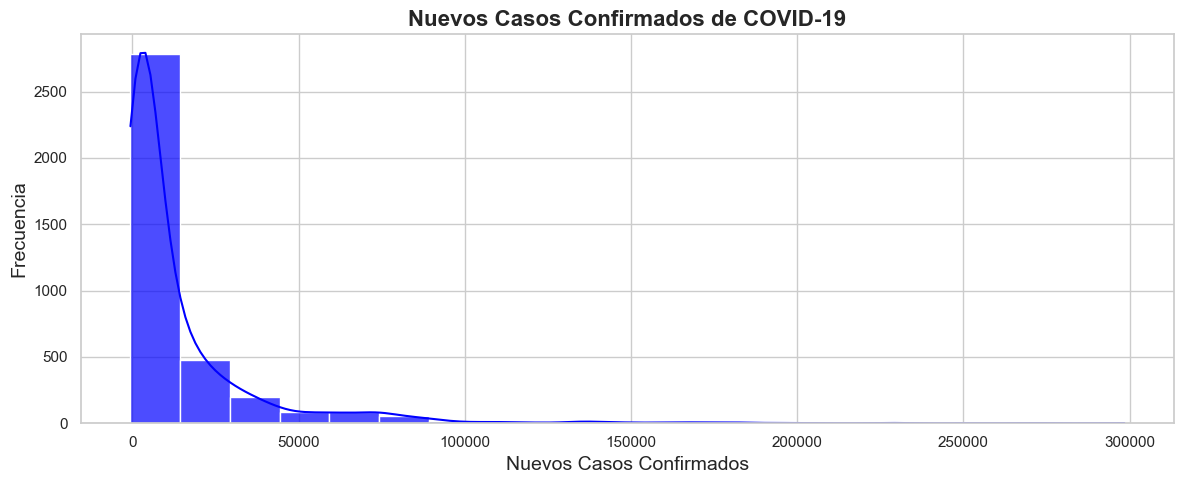

In [54]:
# Configuracion del estilo del gráfico

sns.set(style="whitegrid")  # Estilo con cuadrícula blanca para mejor visualización

# Crear una figura con un tamaño específico (ancho, alto)
plt.figure(figsize=(12, 5))  # Aumentar el tamaño para una mejor visualización

# Crear un histograma con un gráfico de densidad (KDE) para la columna 'new_confirmed'
# - kde=True: Añade la curva de densidad
# - bins=20: Establece el número de intervalos en el histograma
# - color='blue': Establece el color del histograma
# - alpha=0.7: Hace que el color sea un poco transparente
sns.histplot(df['new_confirmed'], kde=True, bins=20, color='blue', alpha=0.7)

# Establecer el título del gráfico con un tamaño de fuente más grande
plt.title('Nuevos Casos Confirmados de COVID-19', fontsize=16, fontweight='bold')  # Título más destacado

# Etiquetar el eje X con un tamaño de fuente más grande
plt.xlabel('Nuevos Casos Confirmados', fontsize=14)  # Etiqueta del eje X

# Etiquetar el eje Y con un tamaño de fuente más grande
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje Y

# Ajustar el espacio entre los elementos del gráfico para evitar superposiciones
plt.tight_layout()  # Ajusta el diseño para que no se superpongan los elementos

# Mostrar el gráfico en pantalla
plt.show()  # Muestra el gráfico

El gráfico muestra una gran variabilidad en los casos diarios, con una tendencia general a la baja, pero con picos ocasionales.

#### 2.3.2 Casos de COVID por fecha

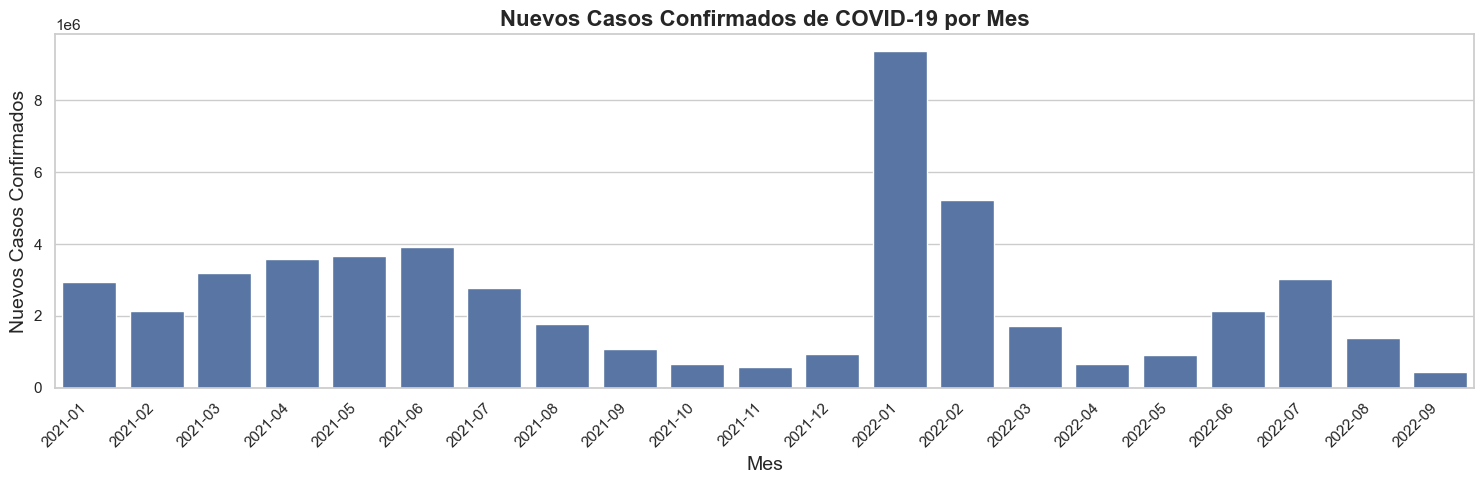

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que 'date' sea datetime
df['date'] = pd.to_datetime(df['date'])

# Crear una nueva columna para los meses (en formato Año-Mes)
df['month'] = df['date'].dt.strftime('%Y-%m')

# Agrupar por mes y país, sumando los nuevos casos confirmados
df_agrupado = df.groupby(['month'])['new_confirmed'].sum().reset_index()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras con los meses en el eje X
plt.figure(figsize=(15, 5))
sns.barplot(
    data=df_agrupado,
    x='month',  # Eje X: Meses
    y='new_confirmed',  # Eje Y: Nuevos casos confirmados
)

# Ajustar los textos del eje X para mayor claridad
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización

# Establecer título y etiquetas
plt.title('Nuevos Casos Confirmados de COVID-19 por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Nuevos Casos Confirmados', fontsize=14)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### 2.3.3 Histograma de dosis de vacunas administradas

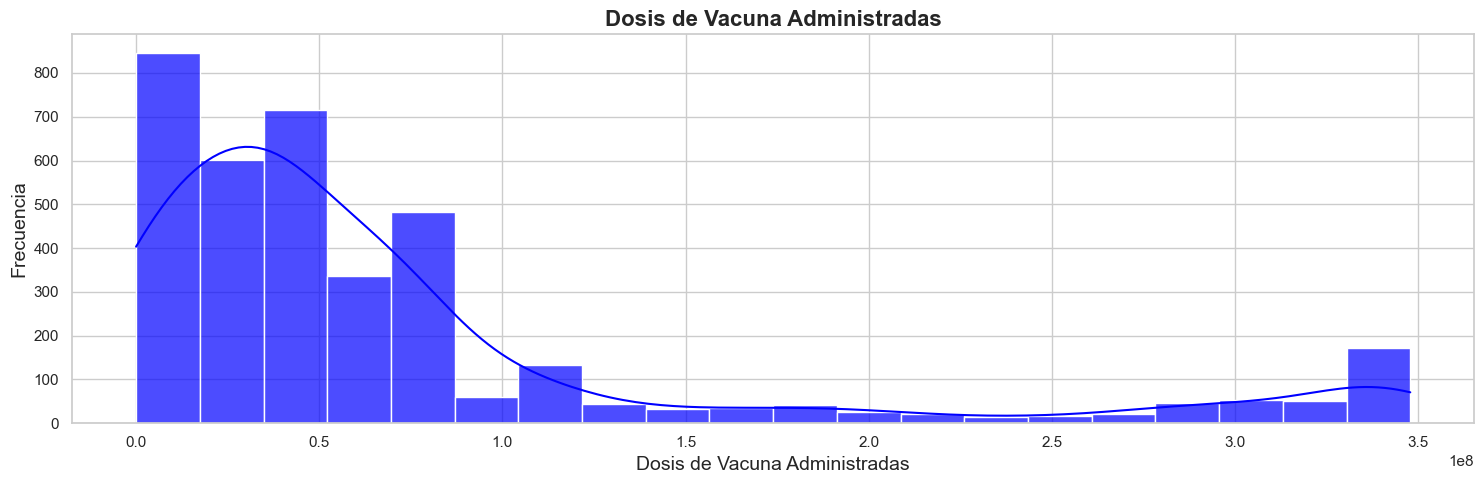

In [56]:
# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid")  # Estilo con cuadrícula blanca para mejor visualización

# Crear una figura con un tamaño específico (ancho, alto)
plt.figure(figsize=(15, 5))  # Aumentar el tamaño para una mejor visualización

# Crear un histograma con un gráfico de densidad (KDE) para la columna 'cumulative_vaccine_doses_administered'
# - kde=True: Añade la curva de densidad
# - bins=20: Establece el número de intervalos en el histograma
# - color='blue': Establece el color del histograma
# - alpha=0.7: Hace que el color sea un poco transparente
sns.histplot(df['cumulative_vaccine_doses_administered'], kde=True, bins=20, color='blue', alpha=0.7)

# Establecer el título del gráfico con un tamaño de fuente más grande
plt.title('Dosis de Vacuna Administradas', fontsize=16, fontweight='bold')  # Título más destacado

# Etiquetar el eje X con un tamaño de fuente más grande
plt.xlabel('Dosis de Vacuna Administradas', fontsize=14)  # Etiqueta del eje X

# Etiquetar el eje Y con un tamaño de fuente más grande
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje Y

# Ajustar el espacio entre los elementos del gráfico para evitar superposiciones
plt.tight_layout()  # Ajusta el diseño para que no se superpongan los elementos

# Mostrar el gráfico en pantalla
plt.show()  # Muestra el gráfico

El gráfico muestra una gran variabilidad en la cantidad de vacunas administradas por grupo, con una tendencia a concentrarse en dosis bajas y algunos picos que podrían indicar campañas de vacunación intensivas o acceso desigual a las vacunas.

#### 2.3.4 Casos nuevos confirmados por región

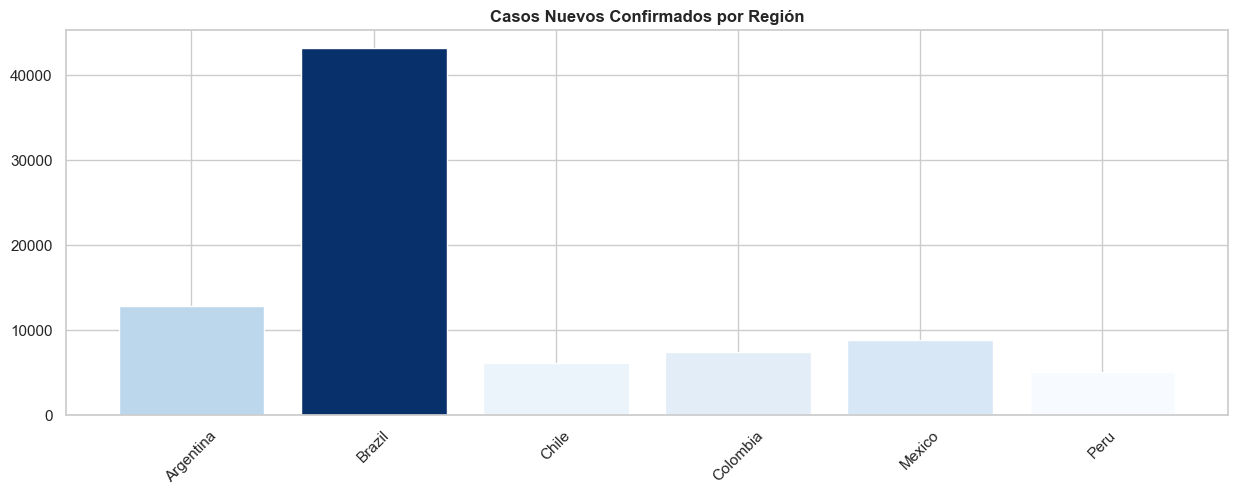

In [57]:
# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Crear una figura con un tamaño específico (ancho, alto)
plt.figure(figsize=(15, 5))

# Calcular el promedio de casos nuevos confirmados por país
avg_cases = df.groupby('country_name')['new_confirmed'].mean().reset_index()

# Normalizar los valores para el colormap
norm = plt.Normalize(avg_cases['new_confirmed'].min(), avg_cases['new_confirmed'].max())

# Crear un colormap de azul
cmap = plt.get_cmap('Blues')

# Ajustar la normalización para que el color más claro no sea tan tenue
scaled_values = norm(avg_cases['new_confirmed']) ** 0.8  # Ajusta el exponente según sea necesario

# Crear un gráfico de barras con el colormap
bars = plt.bar(avg_cases['country_name'], avg_cases['new_confirmed'], color=cmap(scaled_values))

# Establecer el título del gráfico en negrita
plt.title('Casos Nuevos Confirmados por Región', fontweight='bold')

# Rotar las etiquetas del eje X 45 grados para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico en pantalla
plt.show()

El gráfico muestra que Brasil tuvo un número significativamente mayor de nuevos casos confirmados de COVID-19 en comparación con los otros países de América Latina presentados, sugiriendo una mayor tasa de transmisión del virus en ese país durante el período analizado.

#### 2.3. Mapa de calor de correlaciones entre variables_covid

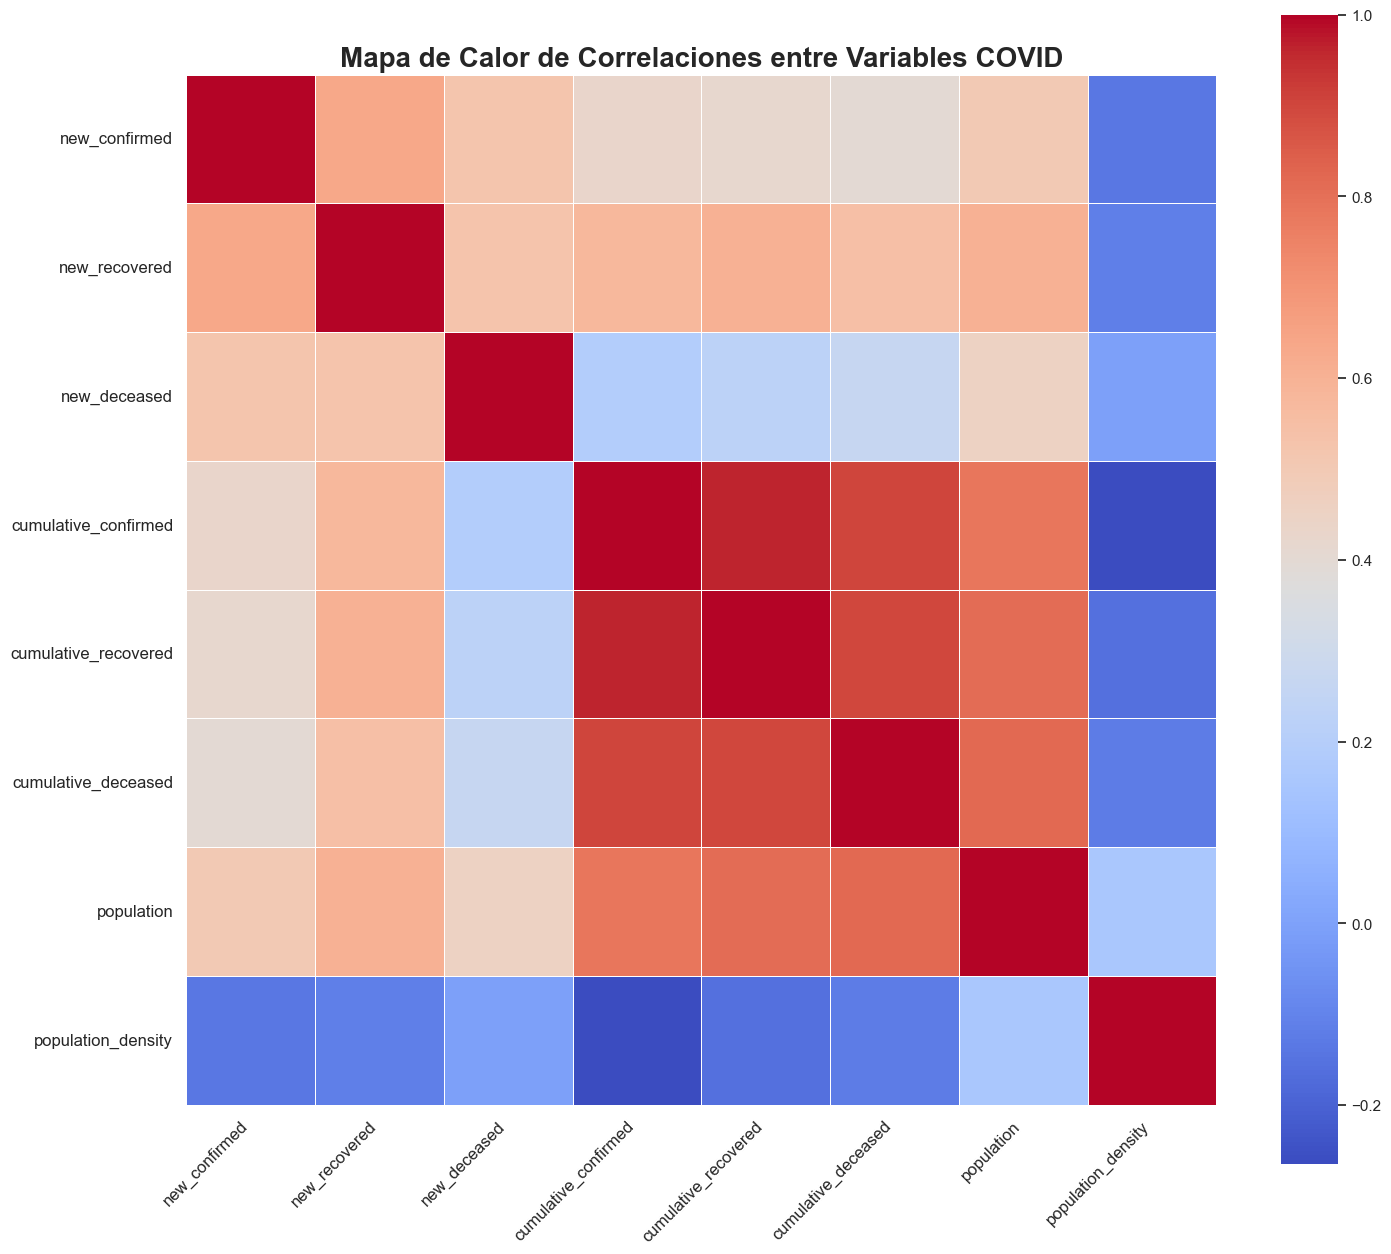

In [58]:
# Crear una figura con un tamaño específico (ancho, alto)
plt.figure(figsize=(15, 15))  # Aumentar aún más el tamaño del gráfico

# Crear un mapa de calor para visualizar la matriz de correlaciones
# - 'correlaciones' es la matriz que se va a visualizar
# - 'annot=False' indica que no se mostrarán los valores en las celdas
# - 'cmap='coolwarm'' establece el esquema de colores del mapa de calor
# - 'linewidths=0.5' establece el ancho de las líneas que separan las celdas
# - 'cbar_kws={"shrink": .8}' ajusta el tamaño de la barra de color
# - 'square=True' hace que las celdas sean cuadradas
sns.heatmap(correlaciones, annot=False, cmap='coolwarm', linewidths=0.5, 
            cbar_kws={"shrink": .8}, square=True)

# Establecer el título del gráfico
plt.title("Mapa de Calor de Correlaciones entre Variables COVID", fontsize=20, fontweight='bold')  # Título más destacado

# Ajustar el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotar etiquetas del eje X y alinearlas a la derecha
plt.yticks(fontsize=12, rotation=0)               # Mantener etiquetas del eje Y en horizontal

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espacio para que no se superpongan las etiquetas
plt.show()  # Mostrar el gráfico en pantalla

#### 2.3. Diagrama de dispersión de la temperatura media contra los casos confirmados

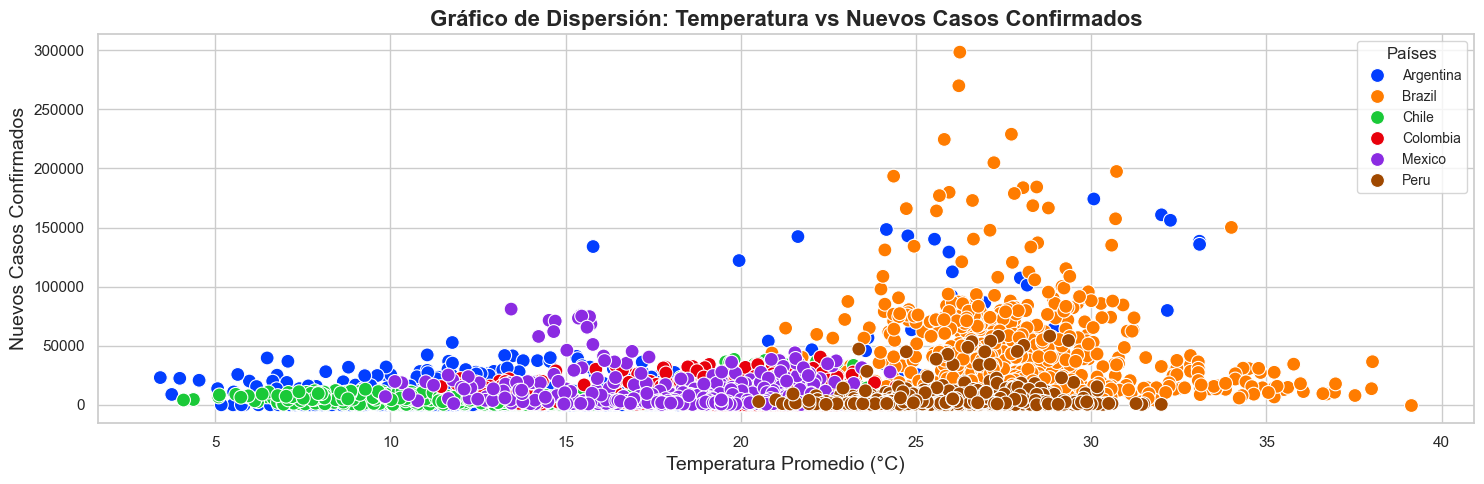

In [59]:
# Crear una figura con un tamaño específico
plt.figure(figsize=(15, 5))  # Ajusta el tamaño del gráfico

# Crear un gráfico de dispersión
# 'data=df' especifica el DataFrame a utilizar
# 'x='average_temperature'' establece el eje X con la temperatura promedio
# 'y='new_confirmed'' establece el eje Y con los nuevos casos confirmados
# 'hue='country_name'' colorea los puntos según el país
# 'palette='viridis'' establece la paleta de colores
# 's=100' establece el tamaño de los puntos
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_confirmed', hue='country_name', palette='bright', s=100)

# Establecer el título del gráfico
plt.title("Gráfico de Dispersión: Temperatura vs Nuevos Casos Confirmados", fontsize=16, fontweight='bold')  # Título más destacado

# Etiquetas de los ejes
plt.xlabel("Temperatura Promedio (°C)", fontsize=14)  # Etiqueta del eje X
plt.ylabel("Nuevos Casos Confirmados", fontsize=14)   # Etiqueta del eje Y

# Ajustar el tamaño de la leyenda
plt.legend(title='Países', fontsize=10, title_fontsize='12')  # Añadir leyenda para identificar los países

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espacio para que no se superpongan las etiquetas
plt.show()  # Mostrar el gráfico

El gráfico muestra que no existe una relación directa entre la temperatura promedio y el número de nuevos casos de COVID-19 en los países latinoamericanos analizados, sugiriendo que otros factores más allá del clima influyen significativamente en la propagación del virus.

#### 2.3. Diagrama de dispersión de la temperatura media contra las muertes confirmadas

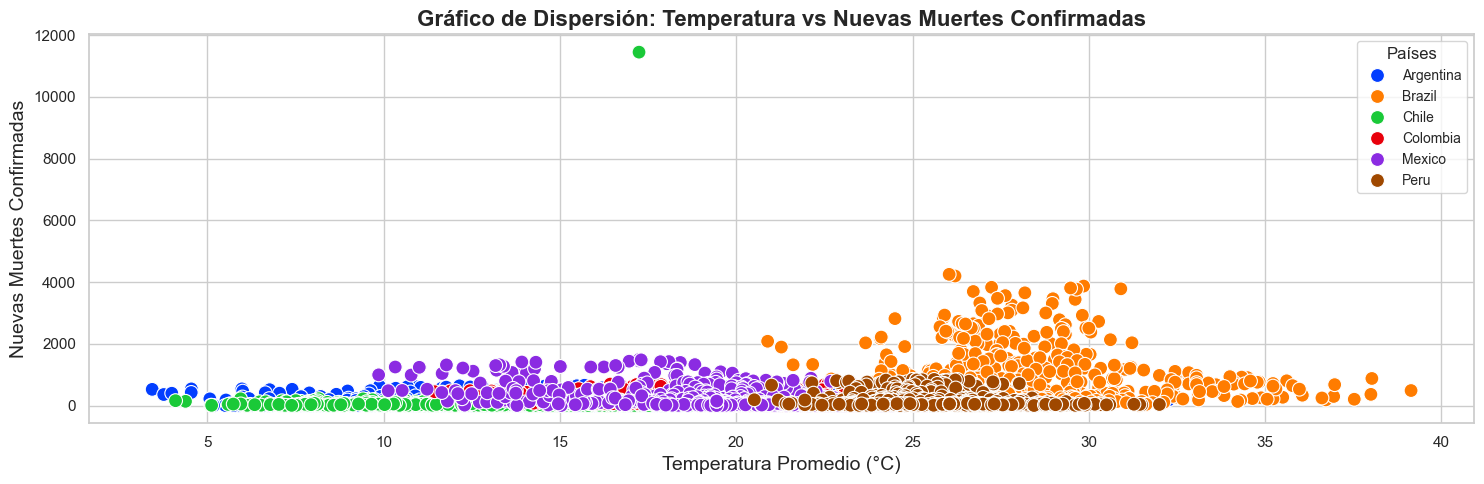

In [60]:
# Segundo gráfico: Gráfico de Dispersión
plt.figure(figsize=(15, 5))  # Ajusta el tamaño del gráfico (ancho, alto)

# Crear un gráfico de dispersión
# - 'data=df' especifica el DataFrame a utilizar
# - 'x='average_temperature'' establece el eje X con la temperatura promedio en Celsius
# - 'y='new_deceased'' establece el eje Y con el número de nuevas muertes confirmadas
# - 'hue='country_name'' colorea los puntos según el país
# - 'palette='viridis'' establece la paleta de colores para los puntos
# - 's=100' establece el tamaño de los puntos en el gráfico
sns.scatterplot(data=df, x='average_temperature_celsius', y='new_deceased', hue='country_name', palette='bright', s=100)

# Establecer el título del gráfico
plt.title("Gráfico de Dispersión: Temperatura vs Nuevas Muertes Confirmadas", fontsize=16, fontweight='bold')  # Título más destacado

# Etiquetas de los ejes
plt.xlabel("Temperatura Promedio (°C)", fontsize=14)  # Etiqueta del eje X
plt.ylabel("Nuevas Muertes Confirmadas", fontsize=14)  # Etiqueta del eje Y

# Ajustar el tamaño de la leyenda
plt.legend(title='Países', fontsize=10, title_fontsize='12')  # Añadir leyenda para identificar los países

# Ajustar el espacio para que no se superpongan las etiquetas
plt.tight_layout()  # Ajustar el espacio para que no se superpongan las etiquetas

# Mostrar el gráfico
plt.show()  # Mostrar el gráfico en pantalla

El gráfico no muestra una relación clara entre la temperatura y el número de muertes por COVID-19. Los puntos están muy dispersos, lo que sugiere que otros factores, como las políticas sanitarias de cada país y el acceso a la salud, influyen más en la mortalidad.

#### 2.3. Histogramas de las variables que “sí” tenga cambios de valores

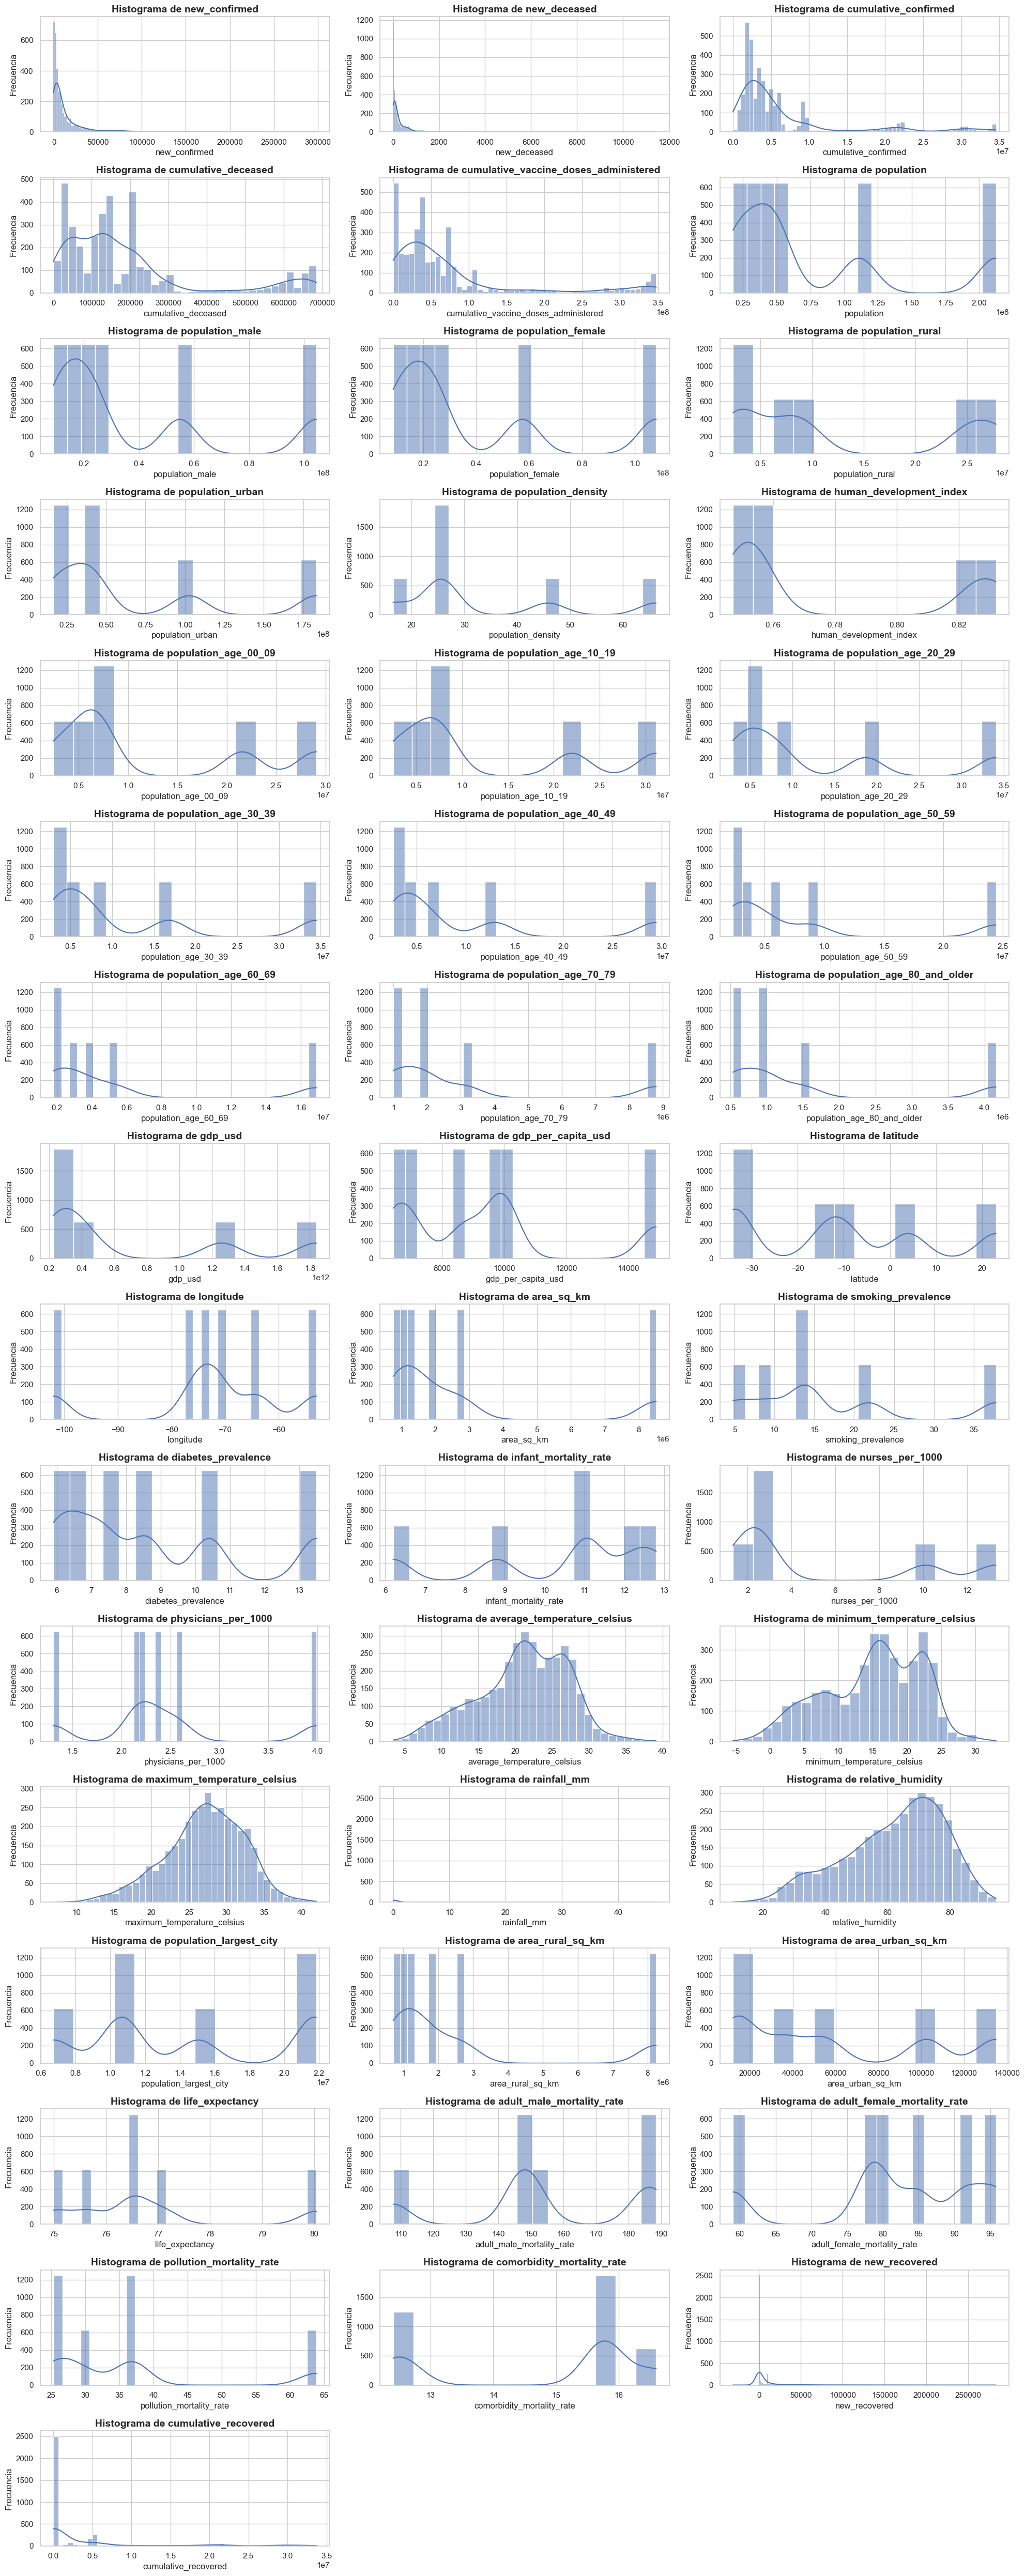

In [61]:
# Filtrar solo las columnas numéricas
numerical_columns = df.select_dtypes(include=[np.number])  # Selecciona solo las columnas numéricas del DataFrame

# Identificar columnas que tienen cambios de valores (no constantes)
variables_con_cambios = numerical_columns.columns[numerical_columns.nunique() > 1]  # Filtra columnas con más de un valor único

# Crear histogramas para cada variable con cambios de valores
plt.figure(figsize=(20, 50))  # Ajustar el tamaño de la figura

# Iterar sobre las variables con cambios de valores
for i, column in enumerate(variables_con_cambios, 1):
    plt.subplot(len(variables_con_cambios) // 3 + 1, 3, i)  # Crear subgráficos en una cuadrícula
    sns.histplot(df[column], kde=True)  # Crear un histograma con densidad (KDE)
    plt.title(f'Histograma de {column}', fontsize=14, fontweight='bold')  # Título del histograma
    plt.xlabel(column, fontsize=12)  # Etiqueta del eje X
    plt.ylabel('Frecuencia', fontsize=12)  # Etiqueta del eje Y

plt.tight_layout()  # Ajustar el layout para que no se superpongan los subgráficos
plt.show()  # Mostrar el gráfico

Los histogramas son una representación gráfica de la distribución de una variable. En este caso, nos ofrecen una visión detallada de cómo se distribuyen las diferentes variables relacionadas con el COVID-19, como el número de nuevos casos, el número de fallecidos, la población, etc.

#### 2.3. Comportamiento de las dosis administradas de todos los países (valor medio)

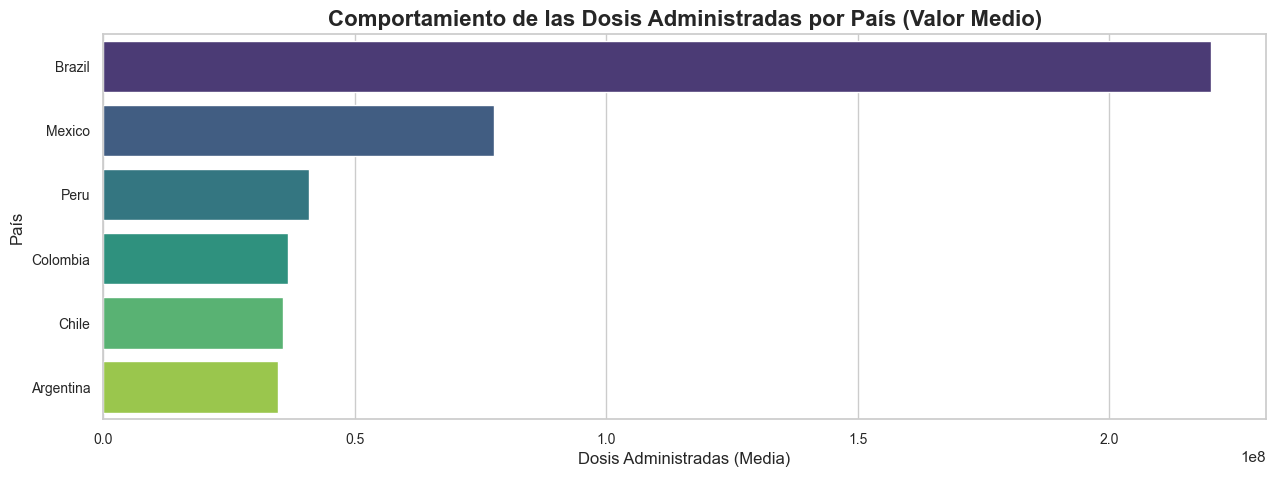

In [62]:
# Calcular la media de dosis administradas por país
media_dosis = df.groupby('country_name')['cumulative_vaccine_doses_administered'].mean().reset_index()  
# Agrupa el DataFrame por 'country_name' y calcula la media de 'cumulative_vaccine_doses_administered' para cada país

# Ordenar los países por la media de dosis administradas
media_dosis = media_dosis.sort_values(by='cumulative_vaccine_doses_administered', ascending=False)  
# Ordena el DataFrame resultante de mayor a menor según la media de dosis administradas

# Graficar el comportamiento de las dosis administradas
plt.figure(figsize=(15, 5))  # Ajusta el tamaño de la figura
sns.barplot(x='cumulative_vaccine_doses_administered', y='country_name', data=media_dosis, hue='country_name', palette='viridis', legend=False)  
# Crea un gráfico de barras con las dosis administradas en el eje X y los países en el eje Y

plt.title('Comportamiento de las Dosis Administradas por País (Valor Medio)', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('Dosis Administradas (Media)', fontsize=12)  # Etiqueta del eje X
plt.ylabel('País', fontsize=12)  # Etiqueta del eje Y
plt.xticks(fontsize=10)  # Ajustar tamaño de las etiquetas del eje X
plt.yticks(fontsize=10)  # Ajustar tamaño de las etiquetas del eje Y
plt.show()  # Mostrar el gráfico

El gráfico muestra que Brasil lidera en el promedio de dosis de vacunas COVID-19 administradas entre los países de América Latina, seguido por México, Perú, Chile, Argentina y Colombia. 

#### 2.3. Evolución de dosis administradas por mes de cada país

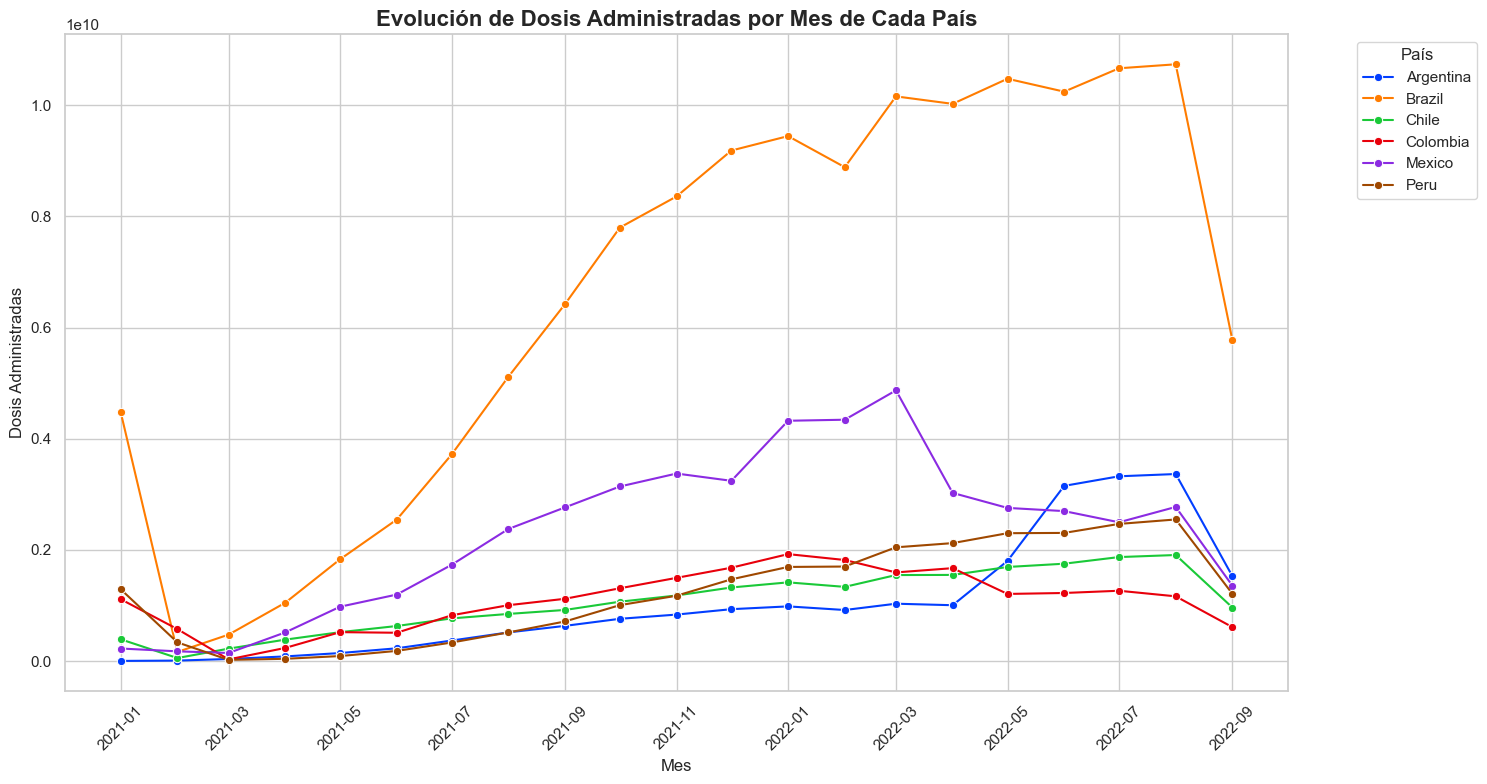

In [63]:
# Asegúrate de que la columna de fecha esté en formato de fecha
df['date'] = pd.to_datetime(df['date'])  # Convierte la columna 'date' a formato de fecha

# Agrupar por país y mes, y sumar las dosis administradas
dosis_por_mes = df.groupby(['country_name', df['date'].dt.to_period('M')])['cumulative_vaccine_doses_administered'].sum().reset_index()  
# Agrupa el DataFrame por 'country_name' y por mes, y suma las dosis administradas

# Convertir la columna de periodo a fecha para la visualización
dosis_por_mes['date'] = dosis_por_mes['date'].dt.to_timestamp()  # Convierte el periodo a un timestamp para graficar

# Graficar la evolución de dosis administradas por mes para cada país
plt.figure(figsize=(15, 8))  # Ajusta el tamaño de la figura
sns.lineplot(data=dosis_por_mes, x='date', y='cumulative_vaccine_doses_administered', hue='country_name', palette='bright', marker='o')  
# Crea un gráfico de líneas con las dosis administradas en el eje Y y el tiempo en el eje X

plt.title('Evolución de Dosis Administradas por Mes de Cada País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('Mes', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Dosis Administradas', fontsize=12)  # Etiqueta del eje Y
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda del gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()  # Ajustar el layout
plt.show()  # Mostrar el gráfico

El gráfico muestra la evolución mensual del número total de dosis de vacunas COVID-19 administradas en Brasil, México, Perú, Chile, Argentina y Colombia, evidenciando un aumento progresivo en la mayoría de los países hasta alcanzar un pico y luego una disminución gradual.

#### 2.3. Muertes por mes de cada país

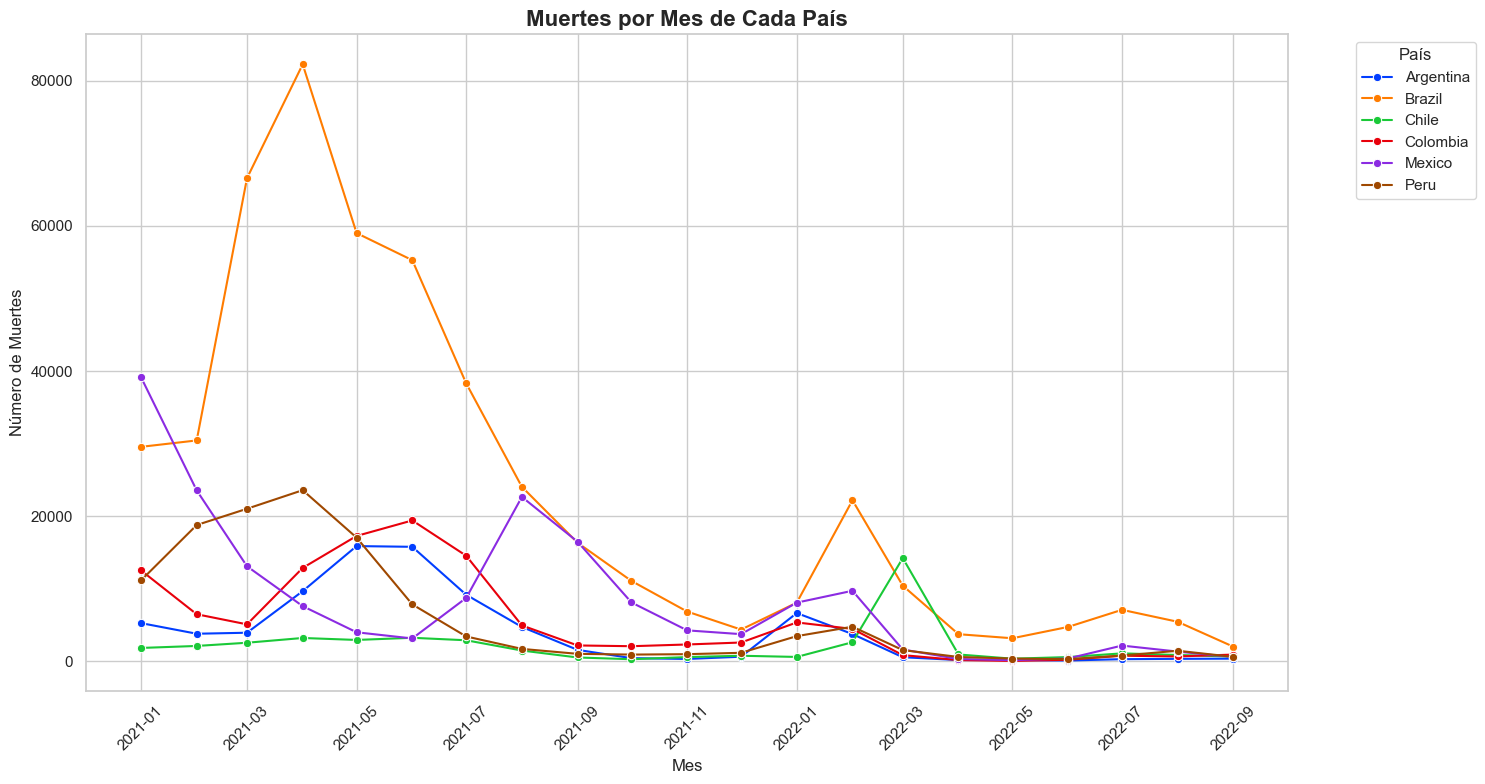

In [64]:
# Agrupar por país y mes, y sumar las muertes
muertes_por_mes = df.groupby(['country_name', df['date'].dt.to_period('M')])['new_deceased'].sum().reset_index()  
# Agrupa el DataFrame por 'country_name' y por mes, y suma el número de muertes

# Convertir la columna de periodo a fecha para la visualización
muertes_por_mes['date'] = muertes_por_mes['date'].dt.to_timestamp()  
# Convierte el periodo a un timestamp para graficar

# Graficar las muertes por mes para cada país
plt.figure(figsize=(15, 8))  # Ajusta el tamaño de la figura
sns.lineplot(data=muertes_por_mes, x='date', y='new_deceased', hue='country_name', palette='bright', marker='o')  
# Crea un gráfico de líneas con el número de muertes en el eje Y y el tiempo en el eje X

plt.title('Muertes por Mes de Cada País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('Mes', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Número de Muertes', fontsize=12)  # Etiqueta del eje Y
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda del gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.tight_layout()  # Ajustar el layout
plt.show()  # Mostrar el gráfico

El gráfico muestra un descenso general en el número de muertes por COVID-19 a lo largo del tiempo en los países de América Latina, con picos variables que coinciden con olas de contagios, pero con una tendencia a la baja en la mayoría de los países.

#### 2.3. Casos confirmados por mes de cada país

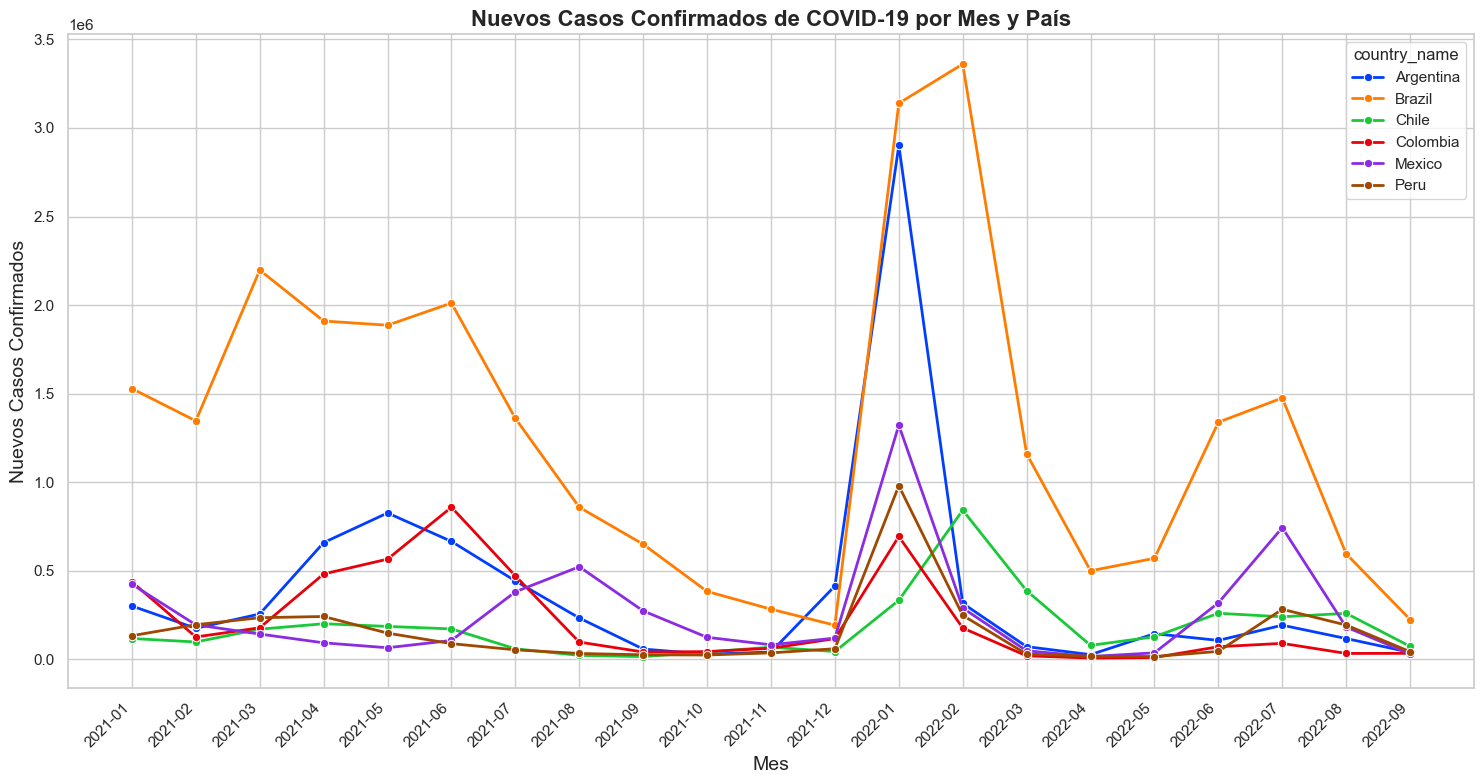

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que 'date' sea datetime
df['date'] = pd.to_datetime(df['date'])

# Crear una nueva columna para los meses (en formato Año-Mes)
df['month'] = df['date'].dt.strftime('%Y-%m')

# Agrupar por mes, país y sumar los nuevos casos confirmados
df_agrupado = df.groupby(['month', 'country_name'])['new_confirmed'].sum().reset_index()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de líneas continuas con los meses en el eje X, separados por país
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=df_agrupado,
    x='month',  # Eje X: Meses
    y='new_confirmed',  # Eje Y: Nuevos casos confirmados
    hue='country_name',  # Diferenciar por país
    palette='bright',  # Aplicar la paleta 'bright'
    marker='o',  # Agregar marcadores a los puntos de los datos
    linestyle='-',  # Línea continua
    linewidth=2  # Establecer el grosor de la línea
)

# Ajustar los textos del eje X para mayor claridad
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización

# Establecer título y etiquetas
plt.title('Nuevos Casos Confirmados de COVID-19 por Mes y País', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Nuevos Casos Confirmados', fontsize=14)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()



#### 2.3. Recuperaciones de casos por mes de cada país

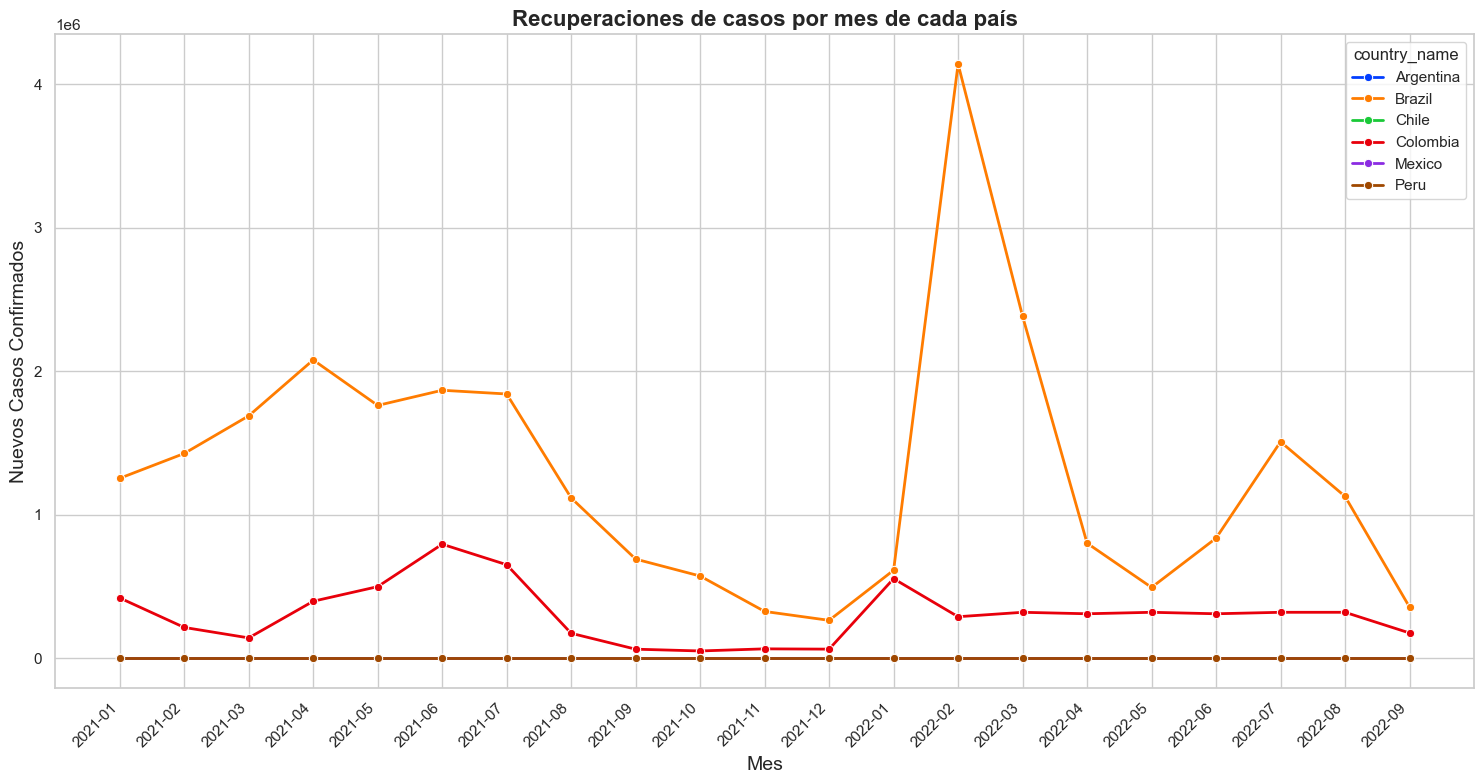

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que 'date' sea datetime
df['date'] = pd.to_datetime(df['date'])

# Crear una nueva columna para los meses (en formato Año-Mes)
df['month'] = df['date'].dt.strftime('%Y-%m')

# Agrupar por mes, país y sumar los nuevos casos confirmados
df_agrupado = df.groupby(['month', 'country_name'])['new_recovered'].sum().reset_index()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de líneas continuas con los meses en el eje X, separados por país
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=df_agrupado,
    x='month',  # Eje X: Meses
    y='new_recovered',  # Eje Y: Nuevos casos confirmados
    hue='country_name',  # Diferenciar por país
    palette='bright',  # Aplicar la paleta 'bright'
    marker='o',  # Agregar marcadores a los puntos de los datos
    linestyle='-',  # Línea continua
    linewidth=2  # Establecer el grosor de la línea
)

# Ajustar los textos del eje X para mayor claridad
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización

# Establecer título y etiquetas
plt.title('Recuperaciones de casos por mes de cada país', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Nuevos Casos Confirmados', fontsize=14)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### 2.3. Comparación del Número de Casos Nuevos entre Países

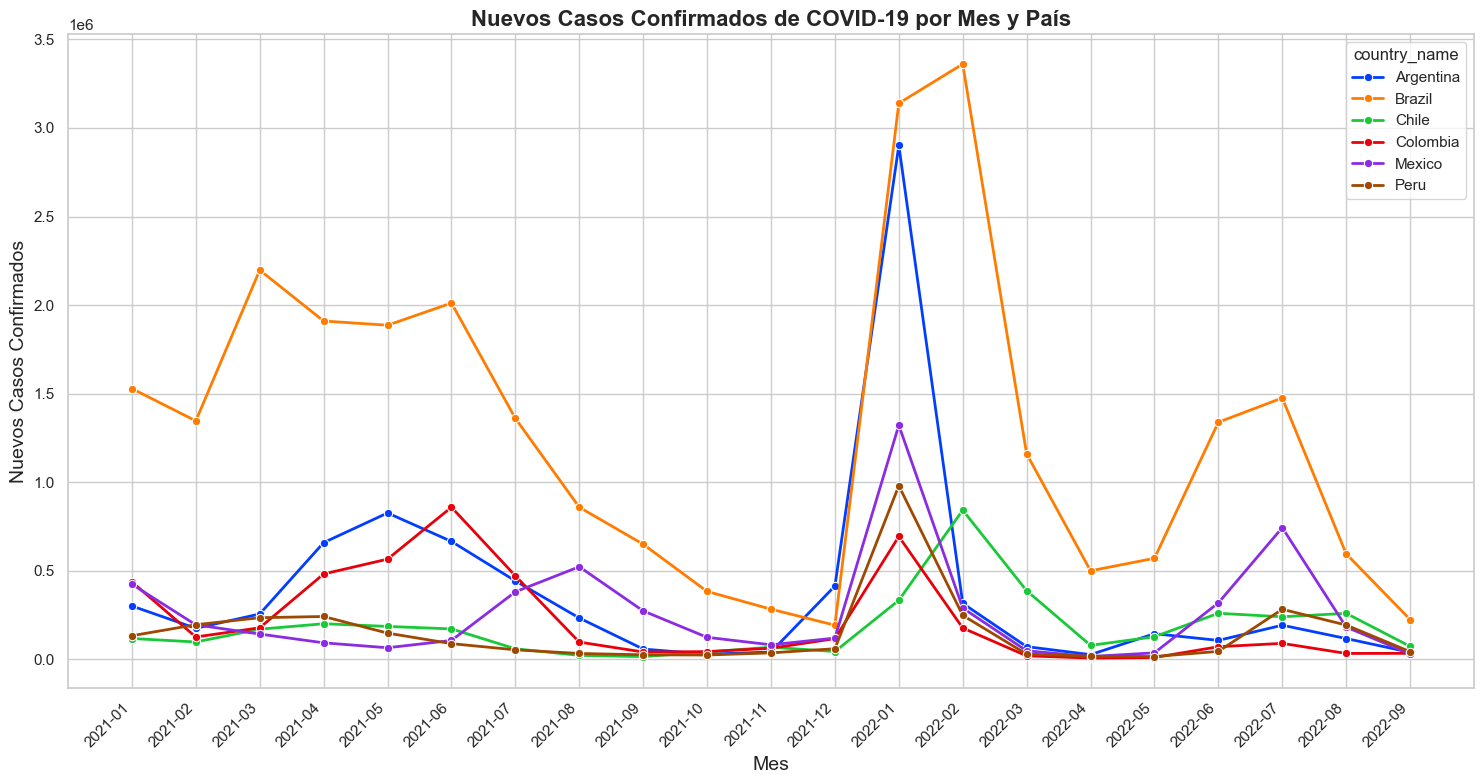

In [67]:
# Asegurarse de que 'date' sea datetime
df['date'] = pd.to_datetime(df['date'])

# Crear una nueva columna para los meses (en formato Año-Mes)
df['month'] = df['date'].dt.strftime('%Y-%m')

# Agrupar por mes, país y sumar los nuevos casos confirmados
df_agrupado = df.groupby(['month', 'country_name'])['new_confirmed'].sum().reset_index()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de líneas continuas con los meses en el eje X, separados por país
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=df_agrupado,
    x='month',  # Eje X: Meses
    y='new_confirmed',  # Eje Y: Nuevos casos confirmados
    hue='country_name',  # Diferenciar por país
    palette='bright',  # Aplicar la paleta 'bright'
    marker='o',  # Agregar marcadores a los puntos de los datos
    linestyle='-',  # Línea continua
    linewidth=2  # Establecer el grosor de la línea
)

# Ajustar los textos del eje X para mayor claridad
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización

# Establecer título y etiquetas
plt.title('Nuevos Casos Confirmados de COVID-19 por Mes y País', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Nuevos Casos Confirmados', fontsize=14)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### 2.3. Boxplot de temperatura media de cada país

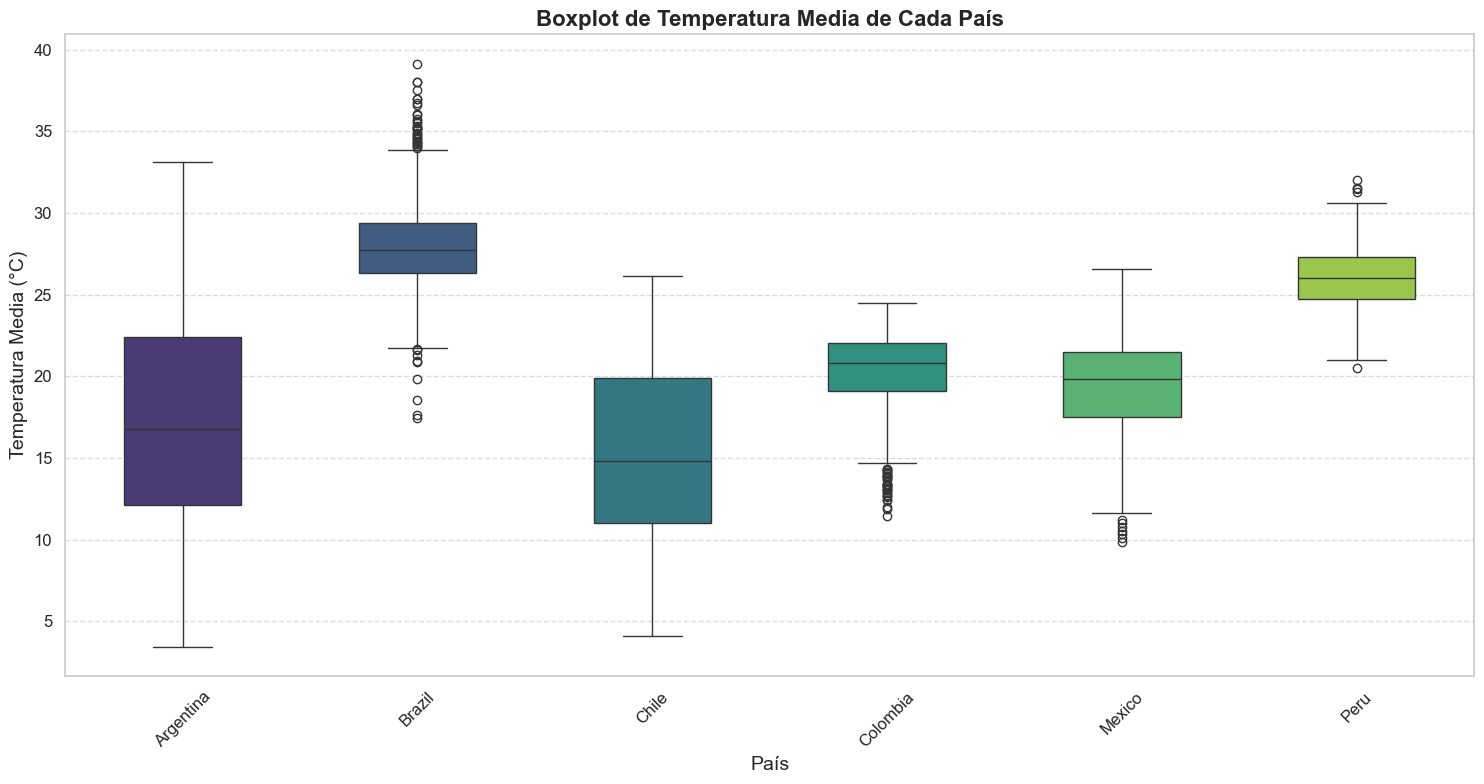

In [68]:
# Asegúrate de que 'date' está en formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convierte la columna 'date' a formato datetime
df = df.dropna(subset=['date'])  # Elimina filas donde 'date' es NaT (no es una fecha)

# Crear la figura para el boxplot
plt.figure(figsize=(15, 8))  # Establece el tamaño de la figura

# Establecer el estilo de fondo
sns.set(style="whitegrid")  # Establece el estilo de fondo

# Crear el boxplot con 'hue' para asignar colores a cada país
boxplot = sns.boxplot(x='country_name', y='average_temperature_celsius', data=df, width=0.5, hue='country_name', palette='viridis', dodge=False)  # Asegúrate de que la columna se llama 'average_temperature'

# Configurar el gráfico
plt.title('Boxplot de Temperatura Media de Cada País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('País', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Temperatura Media (°C)', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje X
plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula en el eje Y
plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
plt.show()  # Mostrar el gráfico

El gráfico de caja y bigotes muestra que la temperatura media anual en Brasil es la más alta entre los países presentados, seguida de México y Colombia, mientras que Argentina presenta la temperatura media más baja.

#### 2.3. Violinplot de las variables que “sí” tenga cambios de valores

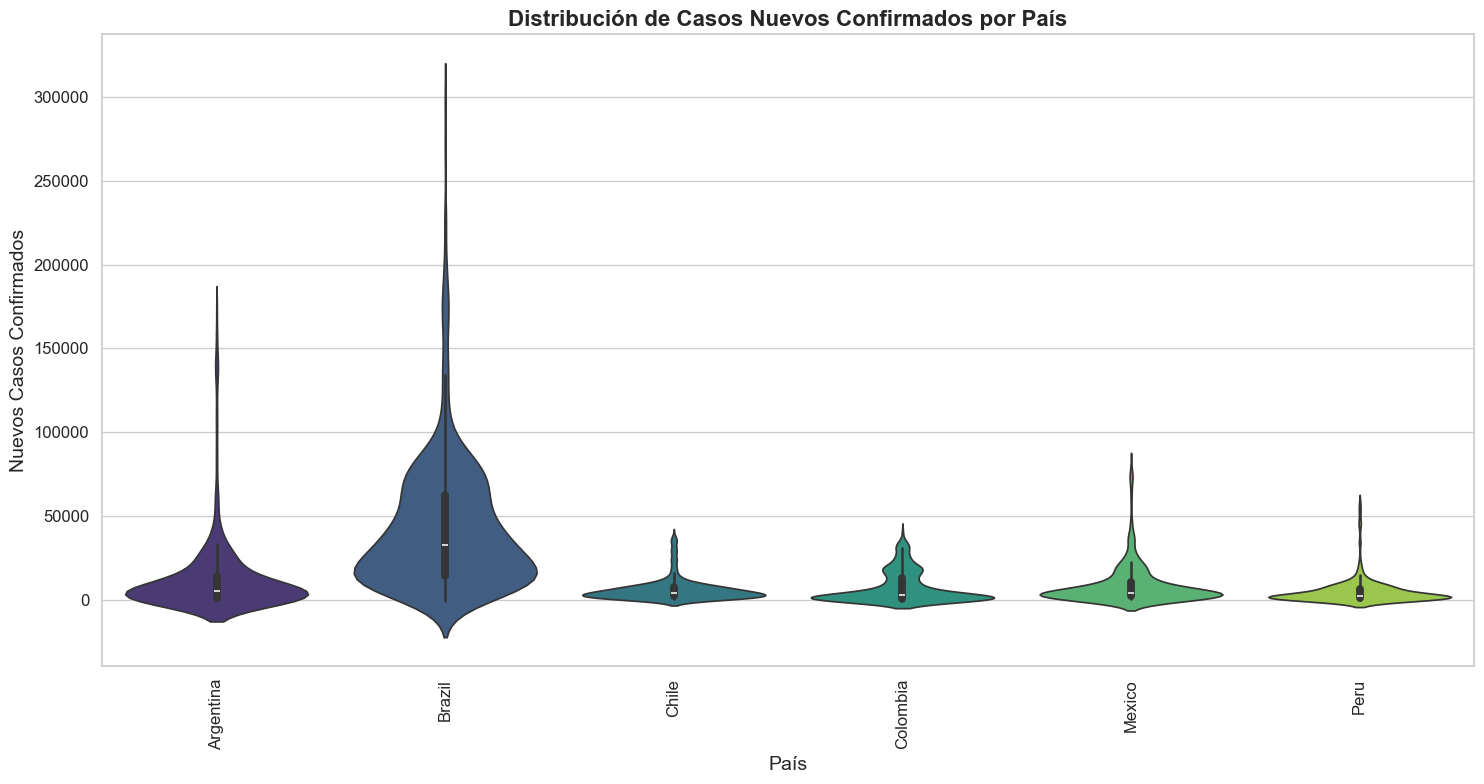

In [69]:
# Asegúrate de que 'new_confirmed' no tiene valores nulos
df = df.dropna(subset=['new_confirmed'])  # Elimina filas donde 'new_confirmed' es NaN

# Violinplot de variables COVID con cambios de valores significativos
plt.figure(figsize=(15, 8))  # Establece el tamaño de la figura

# Establecer el estilo de fondo
sns.set(style="whitegrid")  # Establece el estilo de fondo

# Crear el violinplot con 'hue' para asignar colores a cada país
sns.violinplot(data=df, x='country_name', y='new_confirmed', hue='country_name', palette='viridis', legend=False)  # 'data' es el DataFrame, 'x' es el eje X y 'y' es el eje Y

# Configurar el gráfico
plt.title('Distribución de Casos Nuevos Confirmados por País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('País', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Nuevos Casos Confirmados', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=90, fontsize=12)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje Y
plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
plt.show()  # Mostrar el gráfico

El gráfico de violín muestra la distribución de nuevos casos de COVID-19 por día en seis países latinoamericanos, revelando que Brasil y México presentaron los picos de contagios más altos y una mayor variabilidad, mientras que Chile y Colombia mostraron una menor dispersión en sus datos.

#### 2.3. Distribución de la población por grupos de edad

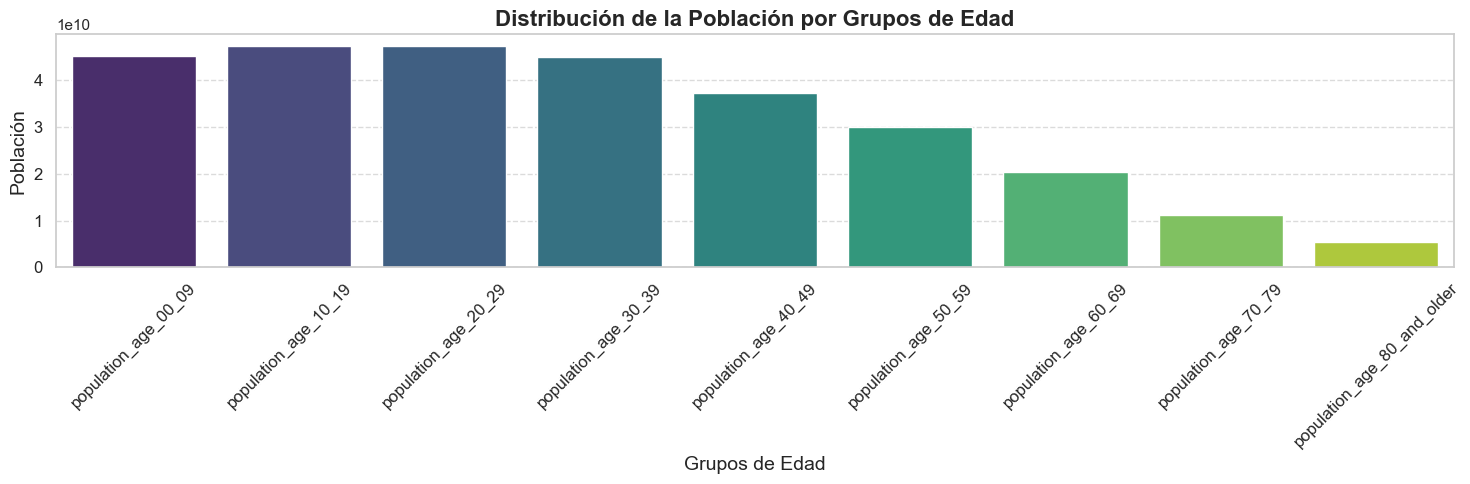

In [70]:
# Asegúrate de que 'date' está en formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convierte la columna 'date' a formato datetime
df = df.dropna(subset=['date'])  # Elimina filas donde 'date' es NaT (no es una fecha)

# Seleccionar las variables de grupos de edad
age_groups = [
    'population_age_00_09',
    'population_age_10_19',
    'population_age_20_29',
    'population_age_30_39',
    'population_age_40_49',
    'population_age_50_59',
    'population_age_60_69',
    'population_age_70_79',
    'population_age_80_and_older'
]

# Crear un nuevo DataFrame para la visualización
age_distribution = df[age_groups].sum().reset_index()  # Sumar la población por grupo de edad
age_distribution.columns = ['Age Group', 'Population']  # Renombrar las columnas

# Crear la figura para el gráfico de barras
plt.figure(figsize=(15, 5))  # Establece el tamaño de la figura

# Crear el gráfico de barras usando la paleta 'viridis'
sns.barplot(x='Age Group', y='Population', data=age_distribution, hue='Age Group', palette='viridis', legend=False)

# Configurar el gráfico
plt.title('Distribución de la Población por Grupos de Edad', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('Grupos de Edad', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Población', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje X
plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula en el eje Y
plt.tight_layout()  # Ajustar el diseño para que no se superpongan elementos
plt.show()  # Mostrar el gráfico

El gráfico de barras muestra una pirámide poblacional típica, con una mayor concentración en los grupos de edad más jóvenes y una disminución progresiva hacia los adultos mayores, siendo el grupo de 20 a 29 años el más numeroso.

#### 2.3. Mapa de calor de métricas por país

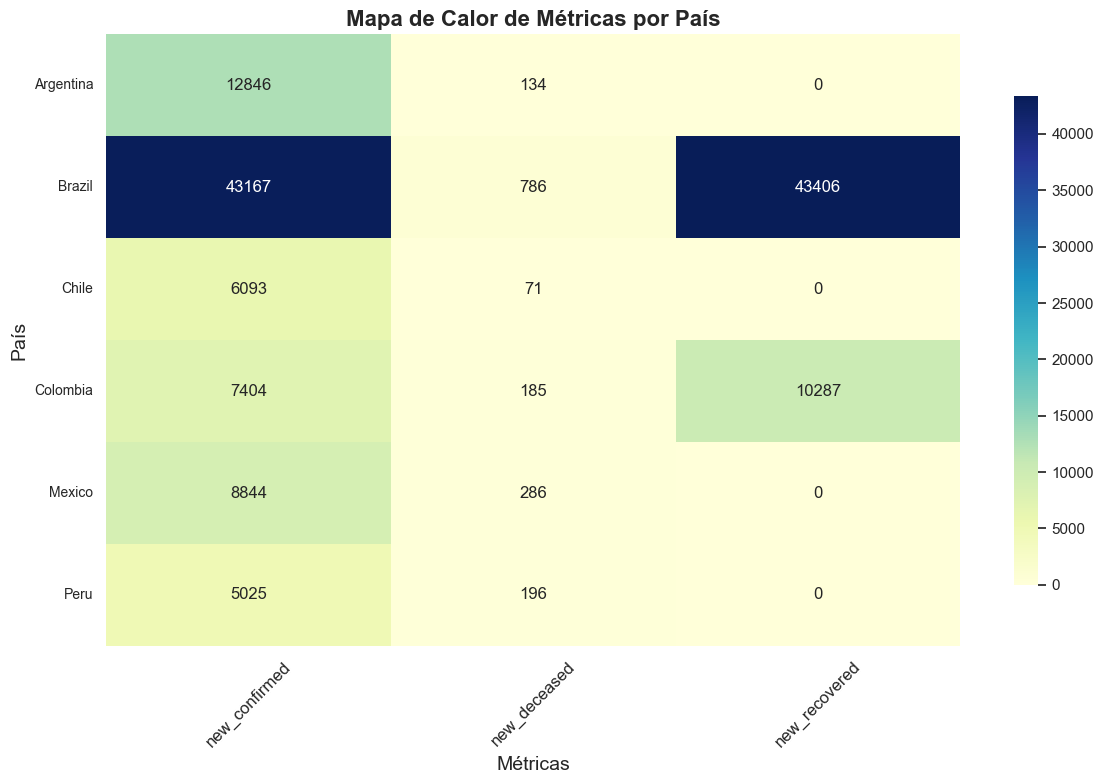

In [71]:
# Agrupar los datos por país y calcular la media de las métricas
metrics_by_country = df.groupby('country_name')[['new_confirmed', 'new_deceased', 'new_recovered']].mean()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))  # Tamaño de la figura
heatmap = sns.heatmap(metrics_by_country, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={"shrink": .8})

# Configurar el gráfico
plt.title('Mapa de Calor de Métricas por País', fontsize=16, fontweight='bold')
plt.xlabel('Métricas', fontsize=14)
plt.ylabel('País', fontsize=14)

# Ajustar el formato del eje Y para evitar notación científica
# No es necesario ajustar el formato del eje Y si ya se están mostrando los nombres de los países
plt.yticks(rotation=0, fontsize=10)  # Mantener etiquetas del eje y horizontales

# Asegurarse de que los nombres de los países se muestren correctamente
heatmap.set_yticklabels(metrics_by_country.index, rotation=0)

plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño
plt.show()

El mapa de calor muestra las diferencias en los indicadores de COVID-19 (nuevos casos, fallecimientos y recuperaciones) entre varios países de América Latina. Cada país está representado por un rectángulo dividido en tres secciones, cada una correspondiente a un indicador. El color de cada sección indica la magnitud del valor, con colores más oscuros representando valores más altos.

#### 2.3. Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país

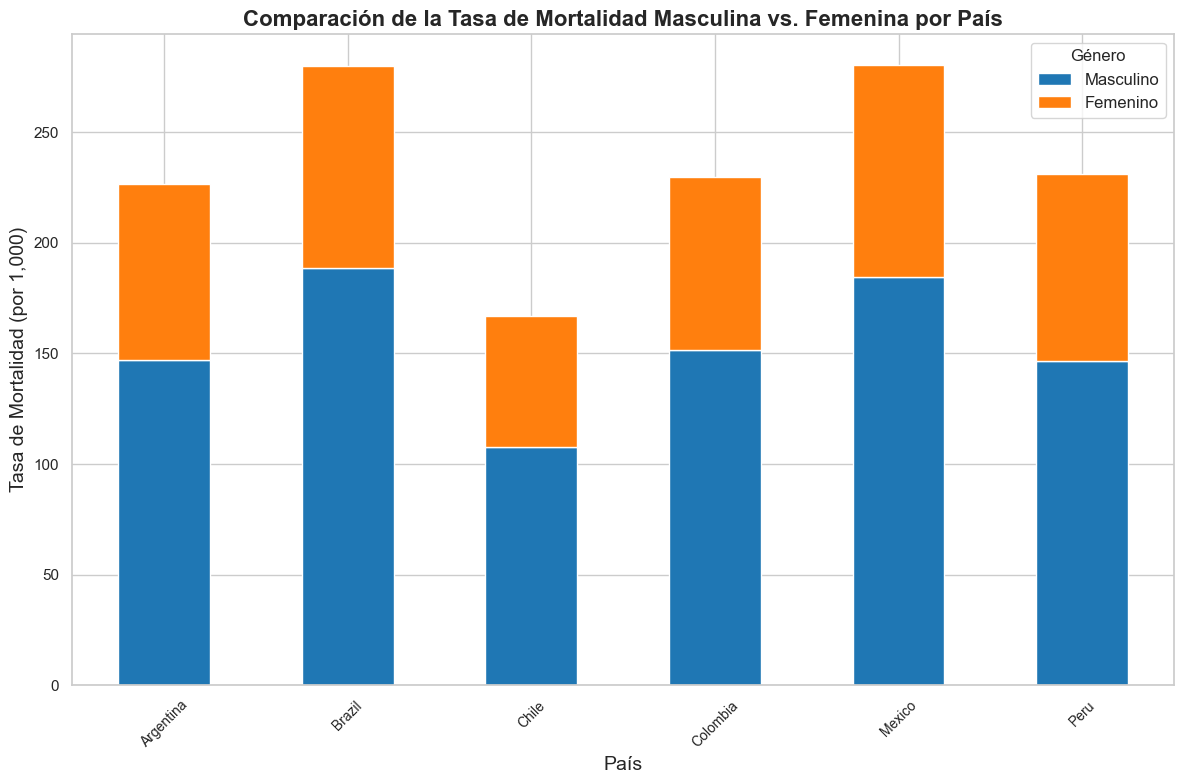

In [72]:
# Agrupar los datos por país y seleccionar las tasas de mortalidad
mortality_rates = df.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean()  # Agrupa por país y calcula la media

# Crear el diagrama de barras apilado
mortality_rates.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])  # Crea el gráfico de barras apiladas

# Configurar el gráfico
plt.title('Comparación de la Tasa de Mortalidad Masculina vs. Femenina por País', fontsize=16, fontweight='bold')  # Título del gráfico
plt.xlabel('País', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Tasa de Mortalidad (por 1,000)', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=45, fontsize=10)  # Rotar etiquetas del eje X
plt.legend(title='Género', labels=['Masculino', 'Femenino'], fontsize=12)  # Leyenda del gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar el gráfico

El gráfico muestra que la tasa de mortalidad masculina es consistentemente más alta que la femenina en todos los países analizados, con Brasil y México presentando las mayores diferencias.

#### 2.3. Matriz de correlación de indicadores demográficos y de salud

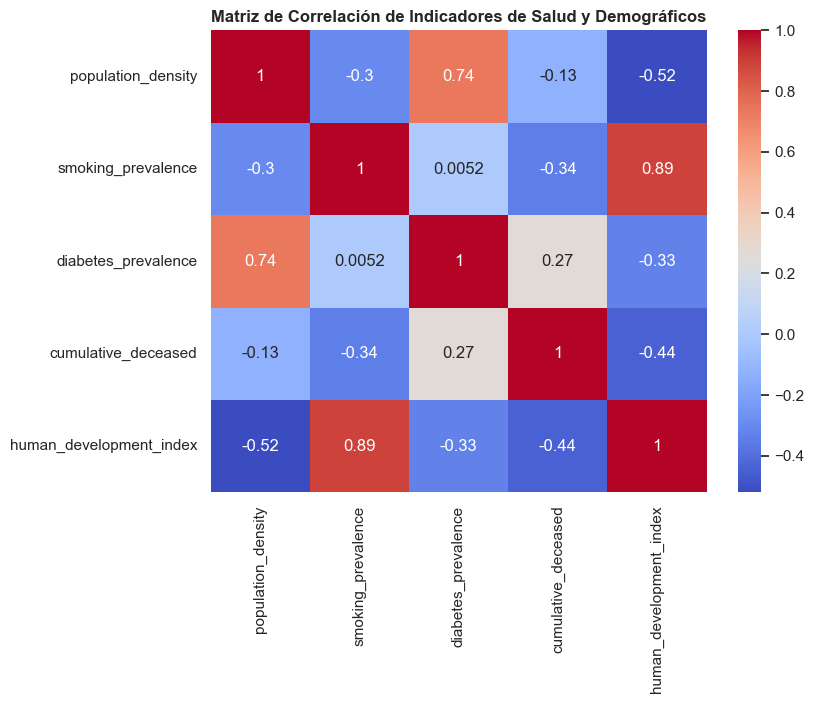

In [73]:
# Seleccionar las columnas relevantes para la matriz de correlación
columns_of_interest = [
    'population_density', 
    'smoking_prevalence', 
    'diabetes_prevalence', 
    'cumulative_deceased', 
    'human_development_index'
]  # Lista de columnas que se utilizarán para calcular la correlación

# Calcular la matriz de correlación
correlation_matrix = df[columns_of_interest].corr()  # Calcula la matriz de correlación

# Crear el mapa de calor
plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Crea el mapa de calor

# Mostrar el gráfico
plt.title('Matriz de Correlación de Indicadores de Salud y Demográficos', fontweight='bold')  # Título del gráfico en negrita
plt.show()  # Muestra el gráfico

La matriz revela una fuerte relación positiva entre densidad poblacional y diabetes, y negativa entre desarrollo humano y tabaquismo. Además, muestra que la mortalidad está inversamente relacionada con el desarrollo humano.

#### 2.3. Comparación de la prevalencia de diabetes y la tasa de mortalidad

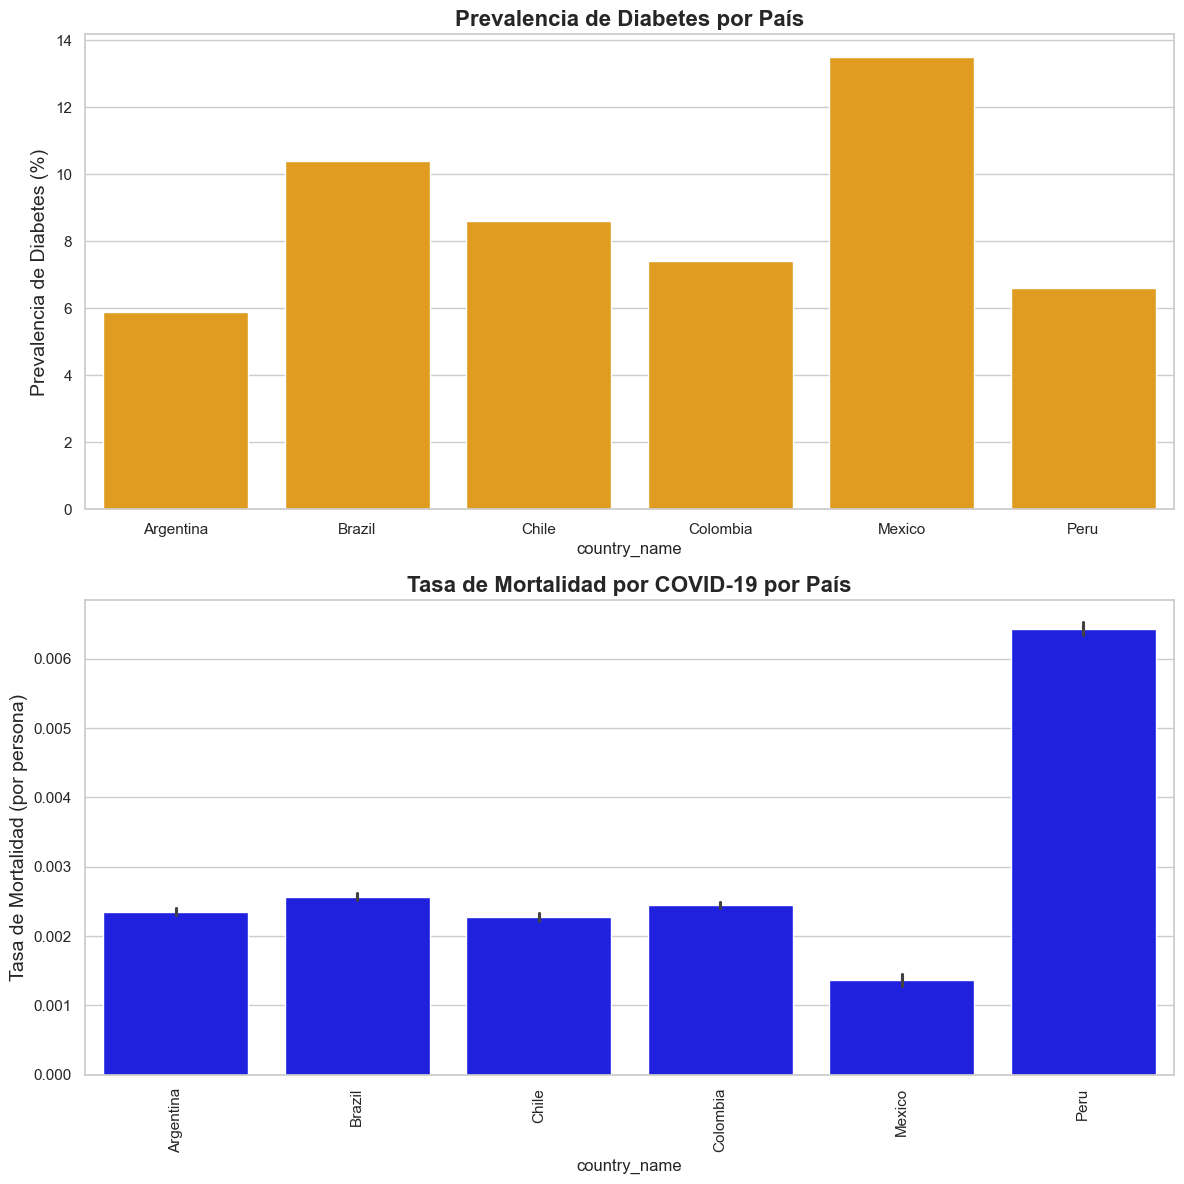

In [74]:
# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))  # Dos gráficos en una columna

# Gráfico de barras para la prevalencia de diabetes
sns.barplot(data=df, x='country_name', y='diabetes_prevalence', color='orange', ax=ax1)
ax1.set_title('Prevalencia de Diabetes por País', fontsize=16, fontweight='bold')  # Título del gráfico en negrita
ax1.set_ylabel('Prevalencia de Diabetes (%)', fontsize=14)  # Etiqueta del eje Y
plt.xticks(rotation=90)  # Rotar etiquetas del eje X para ambos gráficos

# Gráfico de barras para la tasa de mortalidad por COVID-19
sns.barplot(data=df, x='country_name', y=df['cumulative_deceased'] / df['population'], color='blue', ax=ax2)
ax2.set_title('Tasa de Mortalidad por COVID-19 por País', fontsize=16, fontweight='bold')  # Título del gráfico en negrita
ax2.set_ylabel('Tasa de Mortalidad (por persona)', fontsize=14)  # Etiqueta del eje Y

plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar los gráficos

El gráfico muestra que México tiene la mayor prevalencia de diabetes entre los países analizados (Argentina, Brasil, Chile, Colombia y Perú), mientras que Argentina presenta la menor.
El gráfico muestra que Perú tuvo la tasa de mortalidad por COVID-19 más alta entre los países analizados (Argentina, Brasil, Chile, Colombia y México), mientras que México presentó la más baja.

### 2.4 Identificación de tendencias y patrones

#### 2.4.1 Tendencias a largo plazo

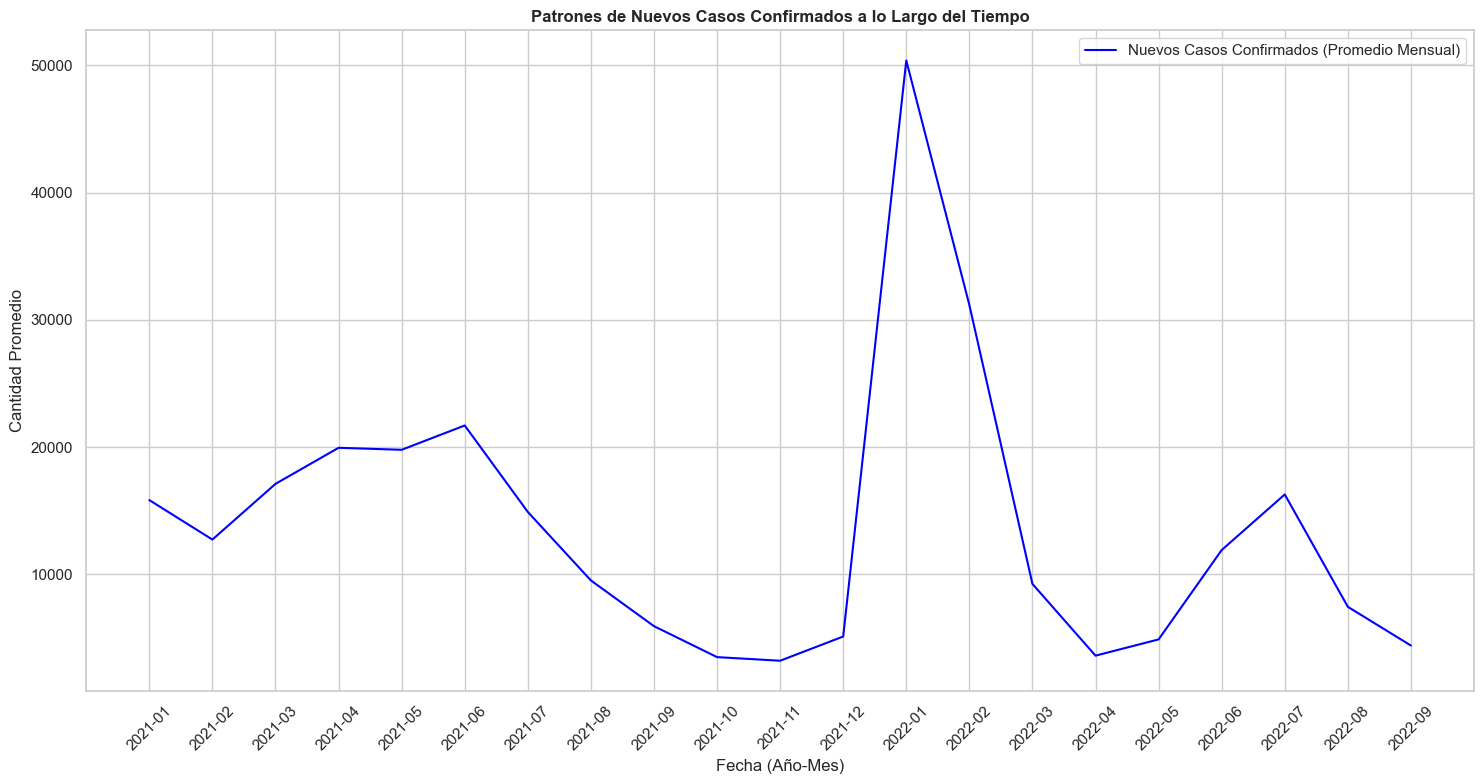

In [75]:
# Extraer el mes y el año de la fecha
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Agrupar por año y mes, y calcular la media
monthly_data = df.groupby(['year', 'month']).agg({'new_confirmed': 'mean'}).reset_index()

# Crear una nueva columna para el eje X que combine año y mes
monthly_data['year_month'] = monthly_data['year'].astype(str) + '-' + monthly_data['month'].astype(str).str.zfill(2)

# Crear una figura para el gráfico de nuevos casos confirmados
plt.figure(figsize=(15, 8))  # Establecer el tamaño de la figura

# Graficar los nuevos casos confirmados (promedio mensual)
sns.lineplot(data=monthly_data, x='year_month', y='new_confirmed', label='Nuevos Casos Confirmados (Promedio Mensual)', color='blue')

# Configuración del gráfico
plt.title('Patrones de Nuevos Casos Confirmados a lo Largo del Tiempo', fontweight='bold')  # Título en negrita
plt.xlabel('Fecha (Año-Mes)')  # Etiqueta del eje X
plt.ylabel('Cantidad Promedio')  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.legend()  # Mostrar la leyenda

# Ajustar el diseño
plt.tight_layout()  # Ajustar el espaciado

# Mostrar el gráfico
plt.show()  # Mostrar el gráfico

El gráfico muestra una tendencia de nuevos casos de COVID-19 con picos y valles a lo largo del tiempo, indicando una variabilidad en la propagación del virus, aunque con una tendencia general a la baja.

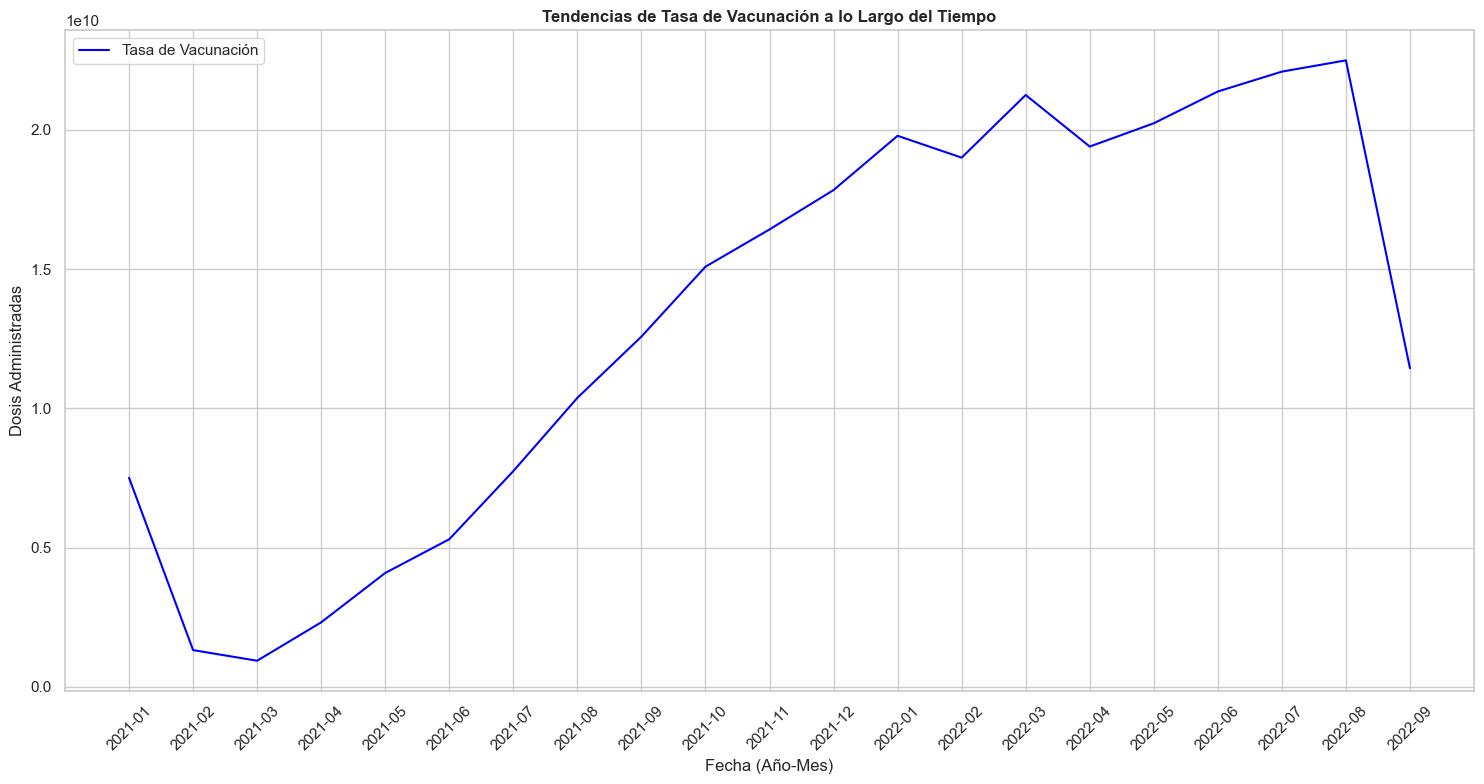

In [76]:
# Asegúrate de que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el año y el mes de la fecha
df['year_month'] = df['date'].dt.to_period('M')  # Crear una columna de año-mes

# Agrupar por año y mes, y sumar las dosis administradas
monthly_vaccine_data = df.groupby('year_month').agg({'cumulative_vaccine_doses_administered': 'sum'}).reset_index()

# Convertir la columna de periodo a string para el eje X
monthly_vaccine_data['year_month'] = monthly_vaccine_data['year_month'].astype(str)

# Crear una figura para el gráfico de la tasa de vacunación
plt.figure(figsize=(15, 8))  # Establecer el tamaño de la figura

# Graficar la tasa de vacunación (dosis administradas a lo largo del tiempo)
sns.lineplot(data=monthly_vaccine_data, x='year_month', y='cumulative_vaccine_doses_administered', label='Tasa de Vacunación', color='blue')

# Configuración del gráfico
plt.title('Tendencias de Tasa de Vacunación a lo Largo del Tiempo', fontweight='bold')  # Título en negrita
plt.xlabel('Fecha (Año-Mes)')  # Etiqueta del eje X
plt.ylabel('Dosis Administradas')  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.legend()  # Mostrar la leyenda

# Ajustar el diseño
plt.tight_layout()  # Ajustar el espaciado

# Mostrar el gráfico
plt.show()  # Mostrar el gráfico

#### 2.4.2 Patrones estacionales

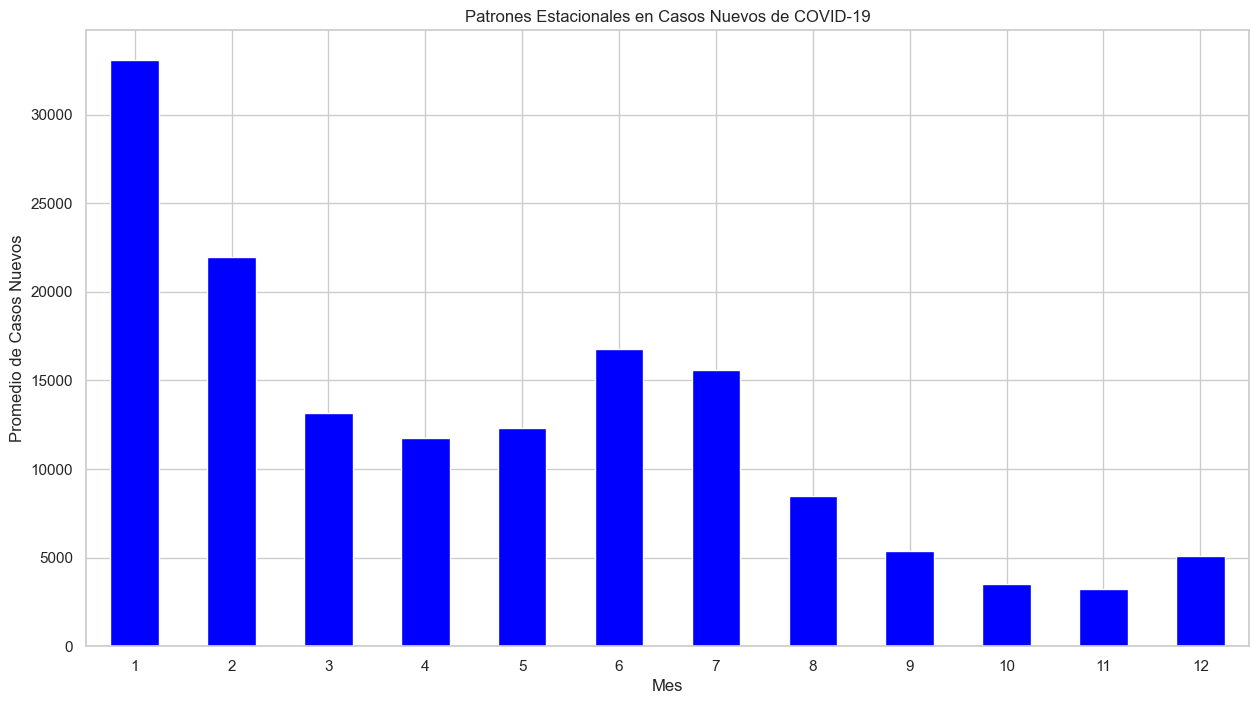

In [77]:
# Extraer el mes de la columna 'date' y crear una nueva columna 'month' en el DataFrame
df['month'] = df['date'].dt.month

# Agrupar los datos por mes y calcular el promedio de casos nuevos confirmados
estacionalidad = df.groupby('month')['new_confirmed'].mean()

# Crear una figura de tamaño 10x5 para el gráfico
plt.figure(figsize=(15, 8))

# Graficar los datos de estacionalidad como un gráfico de barras de color verde
estacionalidad.plot(kind='bar', color='blue')

# Establecer el título del gráfico
plt.title('Patrones Estacionales en Casos Nuevos de COVID-19')

# Etiquetar el eje X como 'Mes'
plt.xlabel('Mes')

# Etiquetar el eje Y como 'Promedio de Casos Nuevos'
plt.ylabel('Promedio de Casos Nuevos')

# Rotar las etiquetas del eje X a 0 grados para que sean horizontales
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

#### 2.4.3 Correlación entre temperatura y casos confirmados

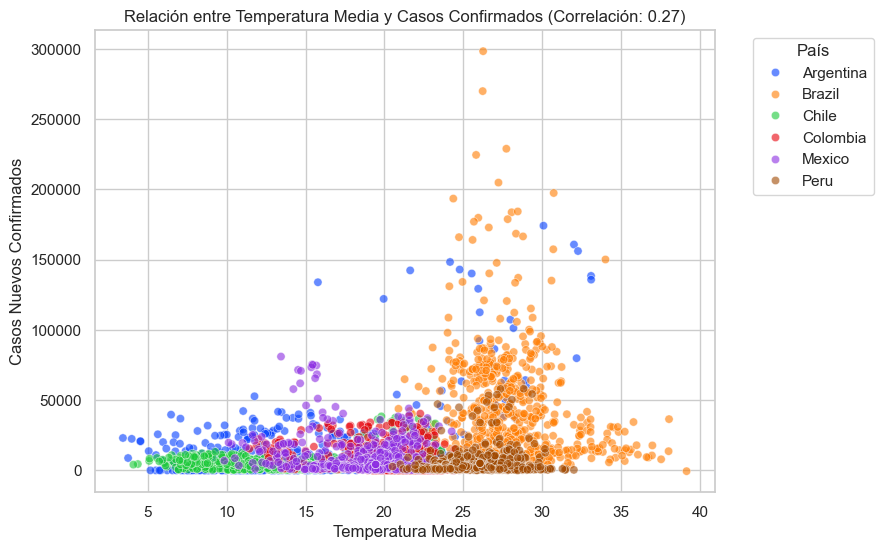

In [78]:
# Calcular la correlación entre la temperatura media y los casos nuevos confirmados
correlacion_temp_casos = df['average_temperature_celsius'].corr(df['new_confirmed'])

# Crear un gráfico de dispersión para visualizar la relación entre temperatura y casos confirmados
plt.figure(figsize=(8, 6))  # Establecer el tamaño de la figura
sns.scatterplot(
    data=df, 
    x='average_temperature_celsius', 
    y='new_confirmed', 
    hue='country_name',  # Colorear los puntos según el país
    palette='bright',
    alpha=0.6  # Ajustar la transparencia de los puntos
)
# Establecer el título del gráfico, incluyendo el valor de la correlación
plt.title(f'Relación entre Temperatura Media y Casos Confirmados (Correlación: {correlacion_temp_casos:.2f})')

# Etiquetar el eje X como 'Temperatura Media'
plt.xlabel('Temperatura Media')

# Etiquetar el eje Y como 'Casos Nuevos Confirmados'
plt.ylabel('Casos Nuevos Confirmados')

# Añadir una leyenda para los países, ubicada fuera del gráfico
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

## *Avance N° 3°*

### Análisis exploratorio

#### 3.1.1 Evolución de Casos Activos vs. Recuperados

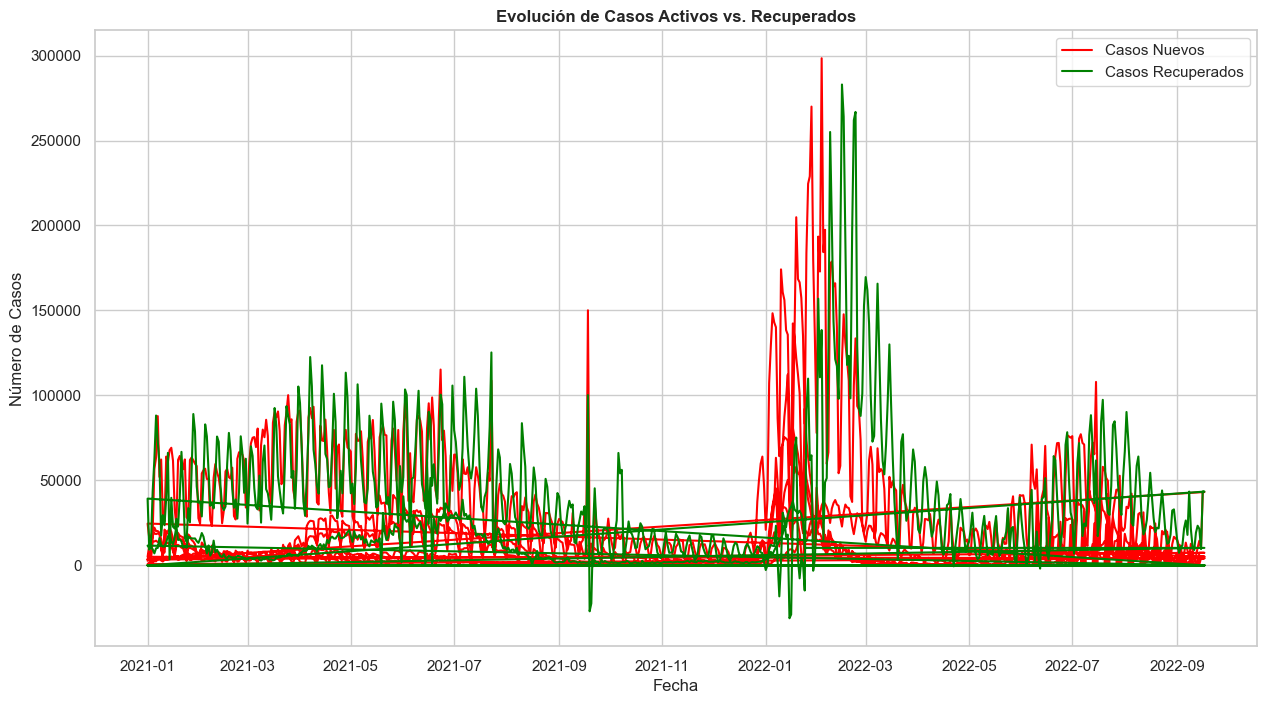

In [79]:
# Visualizar la evolución de casos activos y recuperados
# Crear una figura con un tamaño específico
plt.figure(figsize=(15, 8))

# Graficar la serie de casos nuevos con la fecha en el eje x
plt.plot(df['date'], df['new_confirmed'], label='Casos Nuevos', color='red')

# Graficar la serie de casos recuperados con la fecha en el eje x
plt.plot(df['date'], df['new_recovered'], label='Casos Recuperados', color='green')

# Etiquetar el eje x
plt.xlabel('Fecha')

# Etiquetar el eje y
plt.ylabel('Número de Casos')

# Establecer el título del gráfico y ponerlo en negrita
plt.title('Evolución de Casos Activos vs. Recuperados', fontweight='bold')

# Mostrar la leyenda para identificar las series graficadas
plt.legend()

# Mostrar el gráfico

#### 3.1.2 Relación entre la Cobertura de Vacunación y la Reducción de Casos

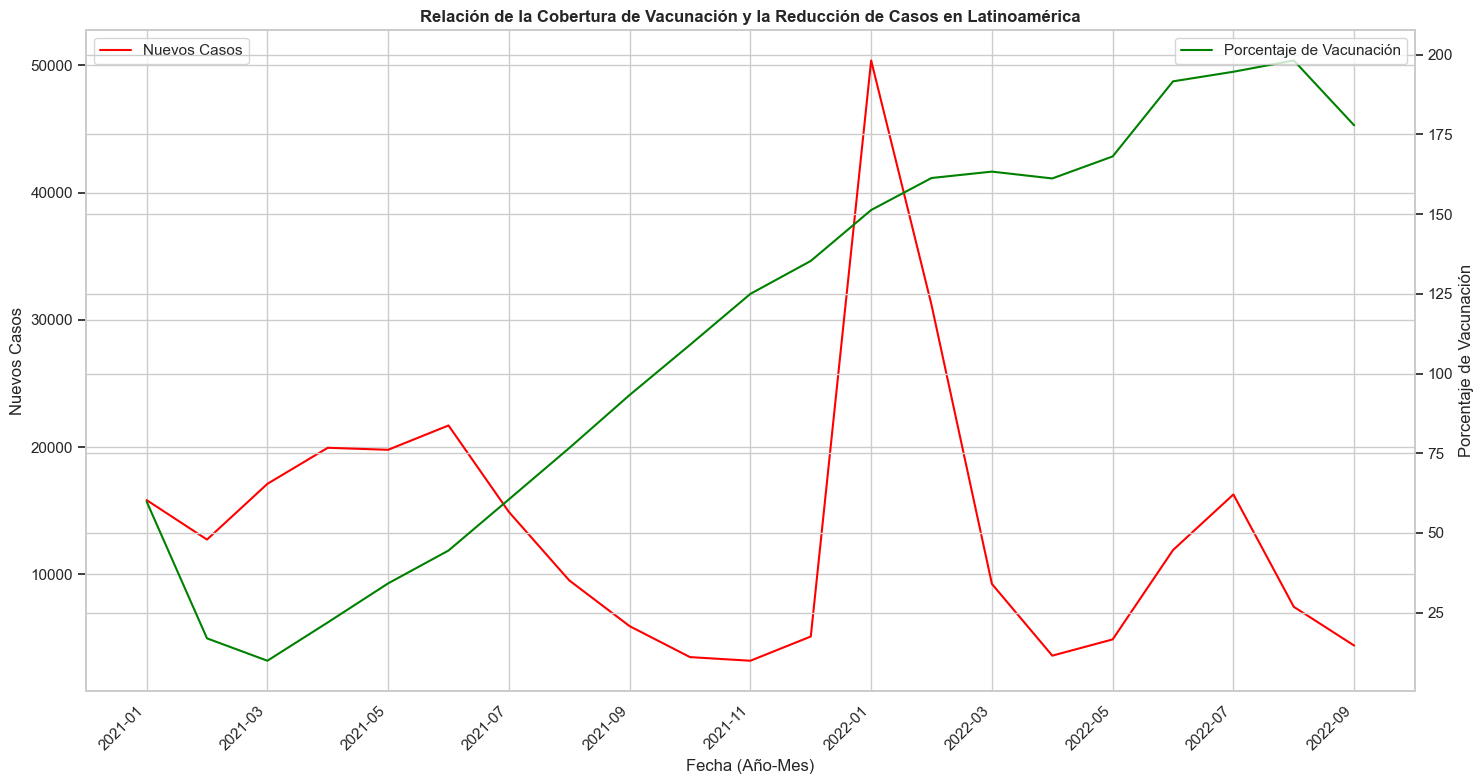

In [80]:
# Creamos los porcentajes de vacunación
df['percentage_vaccinated'] = df['cumulative_vaccine_doses_administered'] / df['population'] * 100

# Agrupar por mes y calcular la media
monthly_data = df.groupby(df['date'].dt.to_period('M')).mean(numeric_only=True).reset_index()

# Crear una nueva columna para el eje X que combine año y mes
monthly_data['year_month'] = monthly_data['date'].dt.strftime('%Y-%m')

# Crear una figura para el gráfico
plt.figure(figsize=(15, 8))  # Aumentar el tamaño de la figura
ax1 = plt.gca()  # Obtener el eje actual
ax2 = ax1.twinx()  # Crear un segundo eje y

# Graficar los nuevos casos confirmados (promedio mensual)
sns.lineplot(data=monthly_data, x='year_month', y='new_confirmed', ax=ax1, color='red', label='Nuevos Casos')

# Graficar el porcentaje de vacunación (promedio mensual)
sns.lineplot(data=monthly_data, x='year_month', y='percentage_vaccinated', ax=ax2, color='green', label='Porcentaje de Vacunación')

# Configuración del gráfico
ax1.set_xlabel('Fecha (Año-Mes)')
ax1.set_ylabel('Nuevos Casos')
ax2.set_ylabel('Porcentaje de Vacunación')
ax1.set_title('Relación de la Cobertura de Vacunación y la Reducción de Casos en Latinoamérica', fontweight='bold')  # Título en negrita

# Ajustar las etiquetas del eje X para evitar superposición
ax1.set_xticks(monthly_data['year_month'][::2])  # Mostrar cada segunda etiqueta
ax1.set_xticklabels(monthly_data['year_month'][::2], rotation=45, ha='right')  # Rotar y alinear a la derecha

# Leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajustar el diseño
plt.tight_layout()  # Ajustar el espaciado

# Mostrar el gráfico
plt.show()

#### 3.1.3 Relacion entre nuevos casos de covid y la temperatura

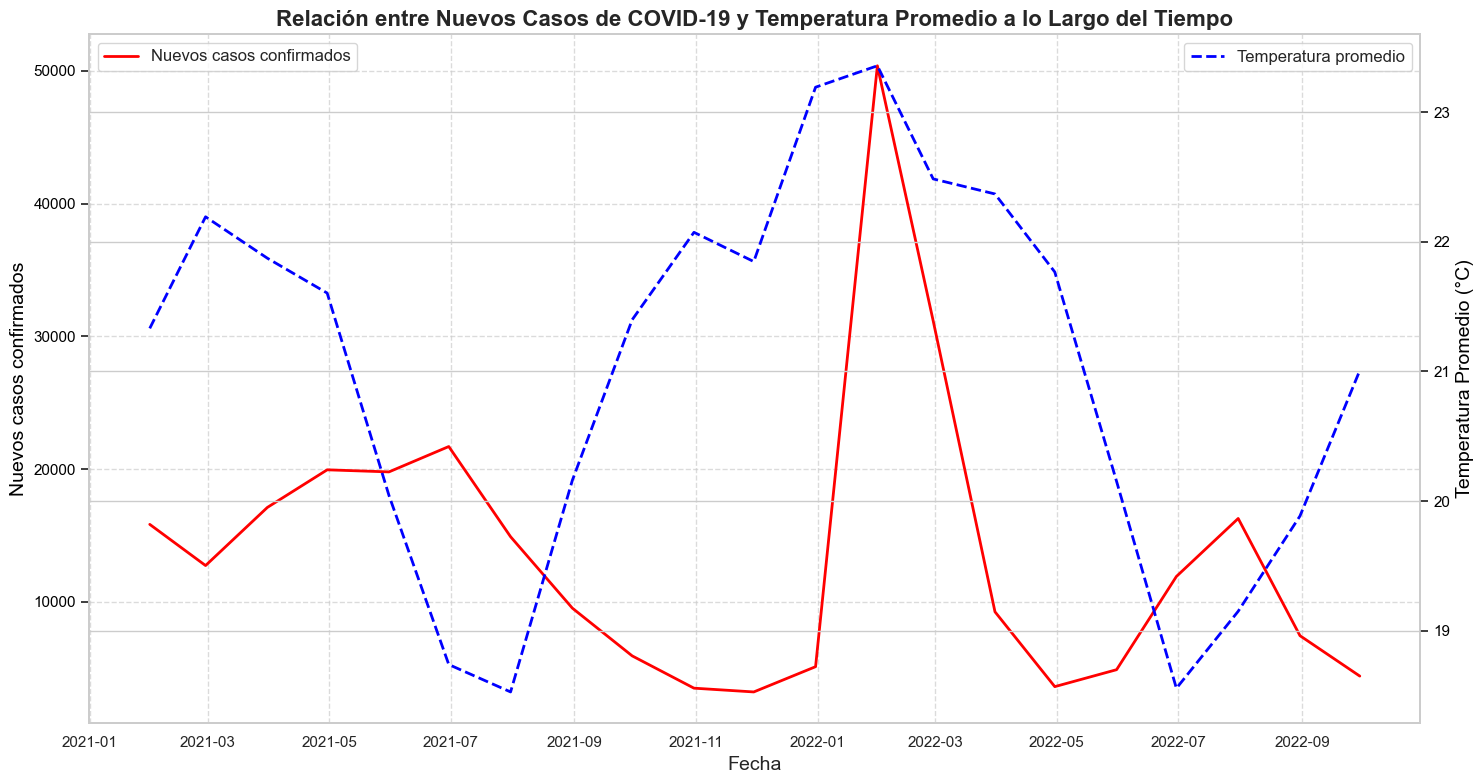

In [81]:
#Resample y calcular la media mensual usando 'ME'
year_month = df.resample('ME', on='date').mean(numeric_only=True).reset_index()

#Crear la figura y los ejes
plt.figure(figsize=(15, 8))
ax1 = plt.gca()  # Eje para nuevos casos
ax2 = ax1.twinx()  # Eje para temperatura

#Graficar nuevos casos confirmados
ax1.plot(year_month['date'], year_month['new_confirmed'], color='red', label='Nuevos casos confirmados', linewidth=2)
ax1.set_ylabel('Nuevos casos confirmados', color='black', fontsize=14)  # Cambiado a negro
ax1.tick_params(axis='y', labelcolor='black')  # Cambiado a negro

#Graficar temperatura promedio con línea discontinua
ax2.plot(year_month['date'], year_month['average_temperature_celsius'], color='blue', label='Temperatura promedio', linewidth=2, linestyle='--')
ax2.set_ylabel('Temperatura Promedio (°C)', color='black', fontsize=14)  # Cambiado a negro
ax2.tick_params(axis='y', labelcolor='black')  # Cambiado a negro

#Configurar el eje x
ax1.set_xlabel('Fecha', fontsize=14)
plt.title('Relación entre Nuevos Casos de COVID-19 y Temperatura Promedio a lo Largo del Tiempo', fontsize=16, fontweight='bold')  # Título en negrita
ax1.grid(True, linestyle='--', alpha=0.7)

#Leyendas
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

#Formato de fechas en el eje x
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))  # Formato de año-mes
plt.xticks(rotation=45)

#Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

#### 3.1.4 Evolución Semanal de Casos Nuevos

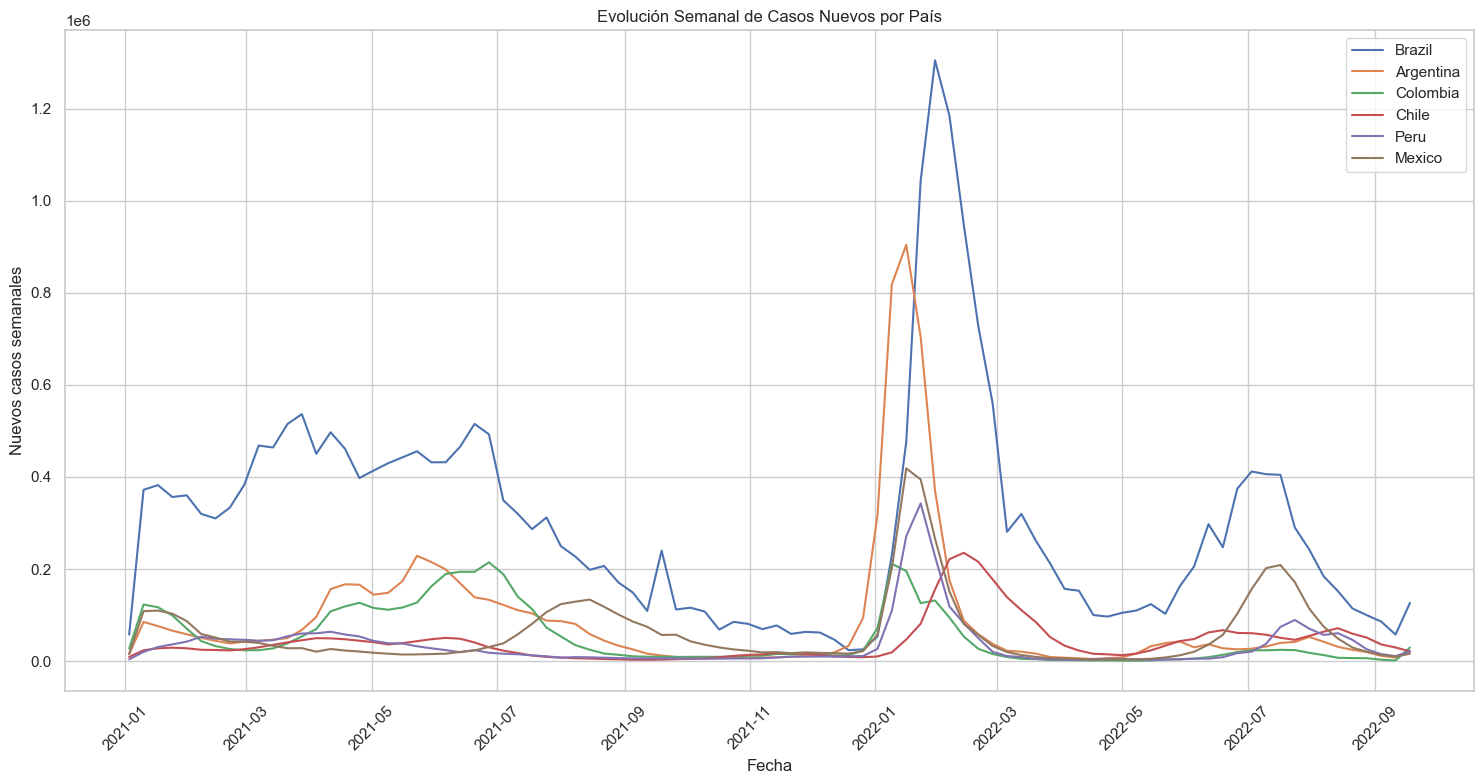

In [82]:
# Identificamos los 5 países con el mayor número de casos acumulados
top_5_countries = df.groupby('country_name')['cumulative_confirmed'].max().nlargest(6).index

# Creamos una figura para el gráfico
plt.figure(figsize=(15, 8))

# Iteramos sobre los 5 países más afectados
for country in top_5_countries:
    # Filtramos los datos del país actual
    country_data = df[df['country_name'] == country]
    
    # Resampleamos los datos semanalmente y calculamos la suma de nuevos casos
    weekly_data = country_data.resample('W', on='date')['new_confirmed'].sum().reset_index()
    
    # Creamos una línea en el gráfico para el país actual
    plt.plot(weekly_data['date'], weekly_data['new_confirmed'], label=country)

# Personalizamos el gráfico
plt.title('Evolución Semanal de Casos Nuevos por País')
plt.xlabel('Fecha')
plt.ylabel('Nuevos casos semanales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3.1.5 Impacto de la Urbanización en la Propagación del Covid-19

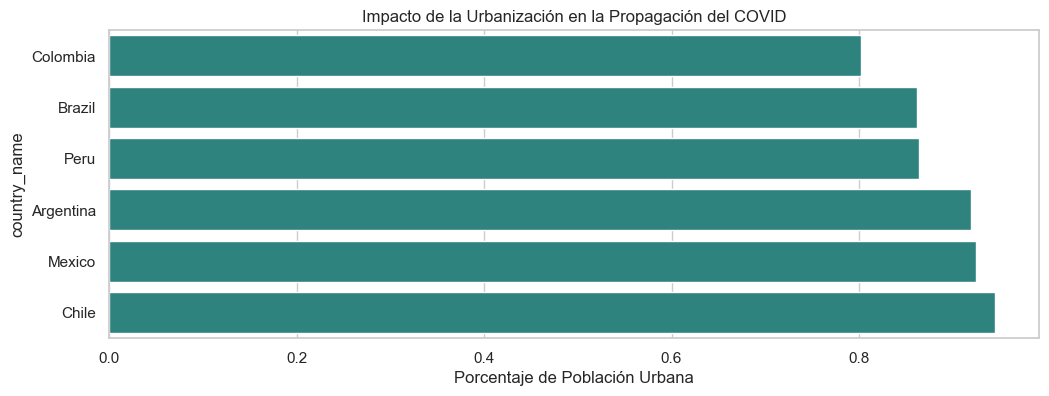

In [83]:
# Calcular el porcentaje de población urbana
df['urban_population_percentage'] = df['population_urban'] / df['population']

# Agrupar y ordenar
casos_urbanos = df.groupby('country_name').last().sort_values(by='urban_population_percentage')

# Crear la figura
plt.figure(figsize=(12, 4))

# Usar un hue constante para evitar la advertencia
sns.barplot(x=casos_urbanos['urban_population_percentage'], y=casos_urbanos.index, hue=[1]*len(casos_urbanos), palette='viridis', legend=False)

plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la Urbanización en la Propagación del COVID')
plt.show()

#### 3.1.6 Evolución Anual de Casos Nuevos

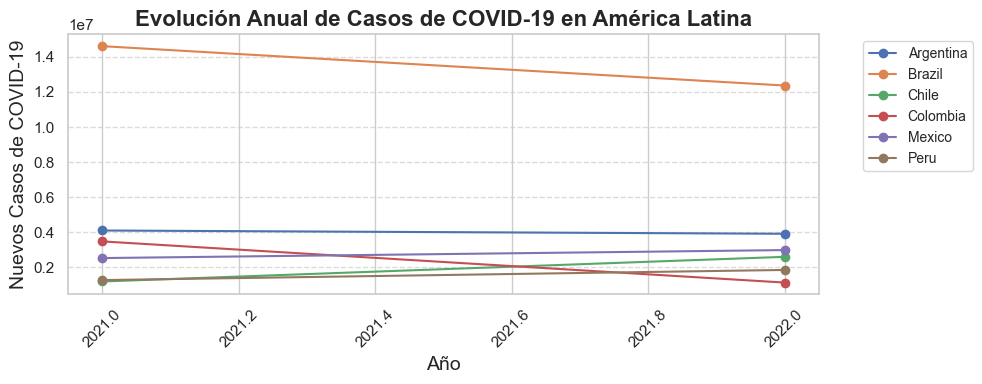

In [84]:
# Crear columna de año
df['year'] = df['date'].dt.year

# Agrupar los casos anuales
casos_anuales = df.groupby(['country_name', 'year'])['new_confirmed'].sum().reset_index()

# Crear la figura
plt.figure(figsize=(10, 4))

# Graficar los casos anuales para cada país
for country in casos_anuales['country_name'].unique():
    country_casos_anuales = casos_anuales[casos_anuales['country_name'] == country]
    plt.plot(
        country_casos_anuales['year'],  # Eje x ahora es por año
        country_casos_anuales['new_confirmed'],
        label=country,
        marker='o'  # Agregar marcadores para cada punto
    )

# Configurar etiquetas y título
plt.xlabel('Año', fontsize=14)
plt.ylabel('Nuevos Casos de COVID-19', fontsize=14)
plt.title('Evolución Anual de Casos de COVID-19 en América Latina', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

#### 3.1.7 Distribución de la Población por Grupo de Edad en los Principales Países de América Latina

<Figure size 1600x1000 with 0 Axes>

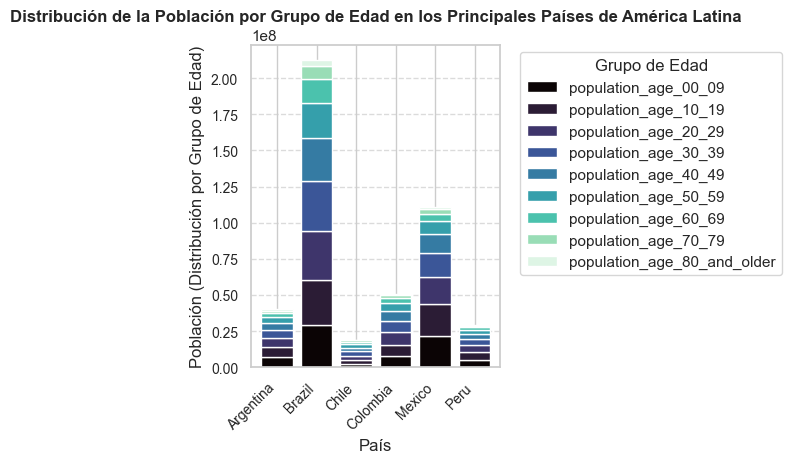

In [85]:
#Filtrar columnas de edad y agrupar los datos
age_columns = [col for col in df.columns if col.startswith('population_age')]
if age_columns:
    # Tomar los últimos datos disponibles por país
    latest_data = df.groupby('country_name').last().reset_index()

#Crear un subconjunto de los datos con las columnas relevantes para la edad
    age_data = latest_data[['country_name'] + age_columns].set_index('country_name')

#Crear la figura con un tamaño ampliado
    plt.figure(figsize=(16, 10))

#Graficar la distribución de edad en los seis primeros países de la lista
    age_data.head(6).plot(kind='bar', stacked=True, colormap='mako', width=0.8)

#Ajustes de diseño
    plt.title('Distribución de la Población por Grupo de Edad en los Principales Países de América Latina', fontweight='bold')
    plt.xlabel('País', fontsize=12)
    plt.ylabel('Población (Distribución por Grupo de Edad)', fontsize=12)

#Configuración de la leyenda
    plt.legend(title='Grupo de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')

#Ajustar el diseño y mejorar la legibilidad
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y para facilitar la lectura

#Ajuste del layout para evitar superposiciones
    plt.tight_layout()
    plt.show()

El gráfico muestra que la distribución por grupos de edad en los principales países de América Latina (Argentina, Brasil, Chile, Colombia, México y Perú) es similar, con una mayor concentración de población en los grupos de edad entre 20 y 59 años, y una menor proporción en los grupos de edad más jóvenes y mayores.

#### 3.1.8 Comparación de Estrategias de Vacunación en América Latina

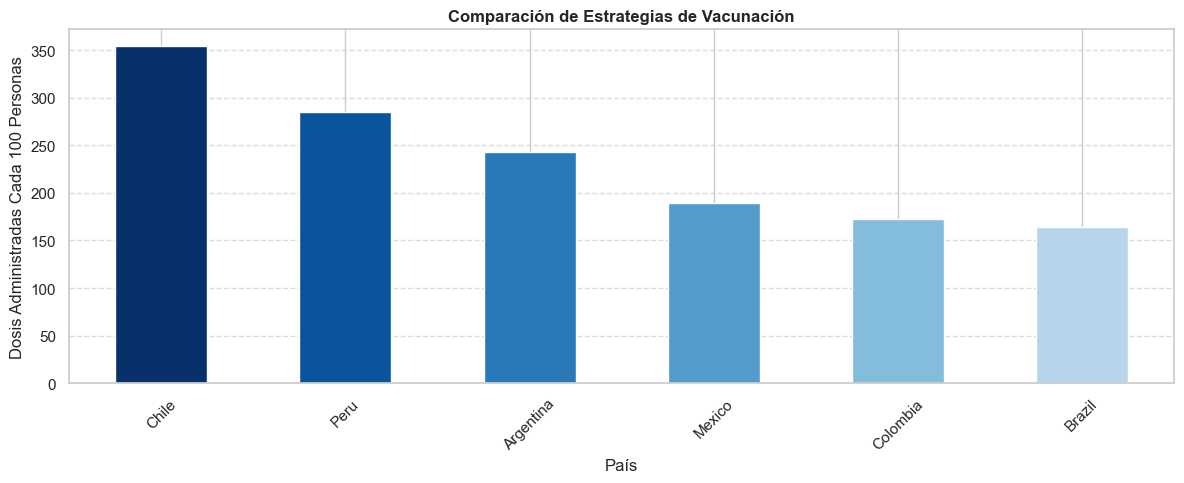

In [86]:
# Calcular la estrategia de vacunación
estrategia_vacunacion = (
    df.groupby('country_name')['cumulative_vaccine_doses_administered'].max() /
    df.groupby('country_name')['population'].mean() * 100
)

# Ordenar los resultados
estrategia_vacunacion = estrategia_vacunacion.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 5))

# Crear un degradado de color azul invertido
colors = plt.cm.Blues(np.linspace(1, 0.3, len(estrategia_vacunacion)))  # Invertir el rango

# Graficar con el degradado
estrategia_vacunacion.plot(kind='bar', color=colors)

# Configurar etiquetas y título
plt.xlabel('País')
plt.ylabel('Dosis Administradas Cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación', fontweight='bold')  # Título en negrita
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

#### 3.1.8 Evolución del Número de Muertes Diarias

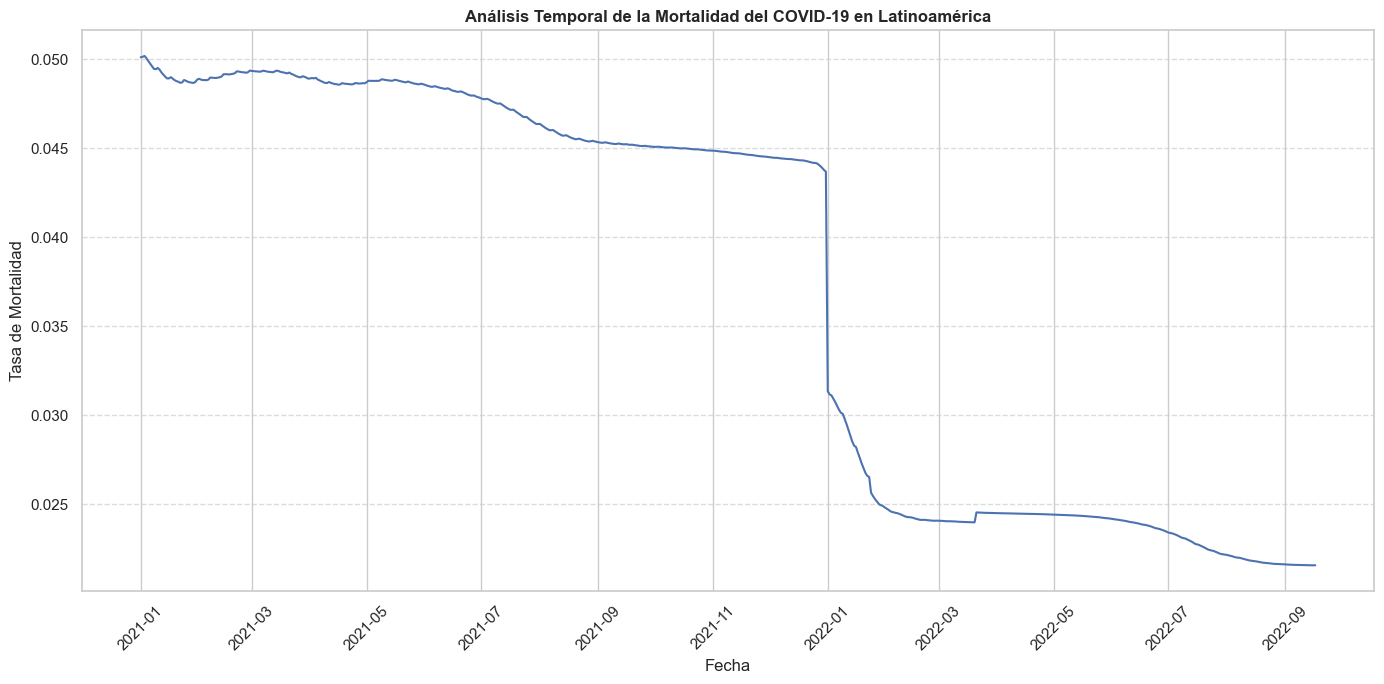

In [87]:
# Calcular la tasa de mortalidad
df['mortality_rate'] = df['cumulative_deceased'] / df['cumulative_confirmed']

# Asegurarse de que la columna 'date' esté en formato de fecha
df['date'] = pd.to_datetime(df['date'])

# Crear el gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='mortality_rate', estimator='mean', errorbar=None)

# Configurar el título y las etiquetas
plt.title('Análisis Temporal de la Mortalidad del COVID-19 en Latinoamérica', fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y
plt.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

#### 3.1.9 Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

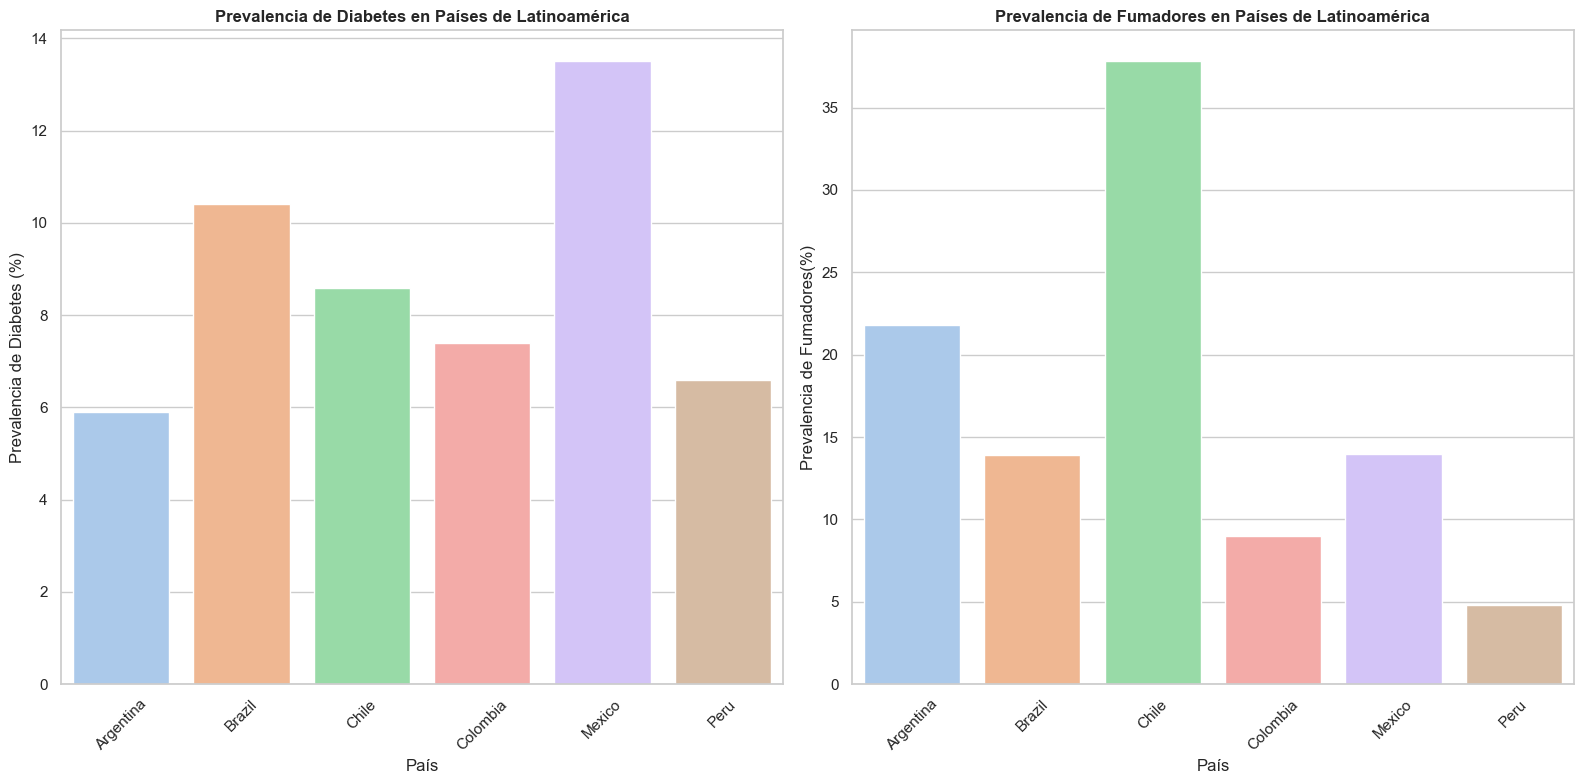

In [88]:
# Filtrar los datos para incluir todos los países
conditions_data = df[['country_name', 'diabetes_prevalence', 'smoking_prevalence']].dropna()

# Crear una figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de prevalencia de diabetes
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', 
            hue='country_name', dodge=False, palette='pastel', ax=axes[0])
axes[0].set_xlabel('País')
axes[0].set_ylabel('Prevalencia de Diabetes (%)')
axes[0].set_title('Prevalencia de Diabetes en Países de Latinoamérica', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Gráfico de prevalencia de fumar
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', 
            hue='country_name', dodge=False, palette='pastel', ax=axes[1])
axes[1].set_xlabel('País')
axes[1].set_ylabel('Prevalencia de Fumadores(%)')
axes[1].set_title('Prevalencia de Fumadores en Países de Latinoamérica', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

Los gráficos muestran que México tiene la mayor prevalencia de diabetes y Chile la mayor prevalencia de fumadores entre los países de Latinoamérica presentados (Argentina, Brasil, Chile, Colombia, México y Perú).

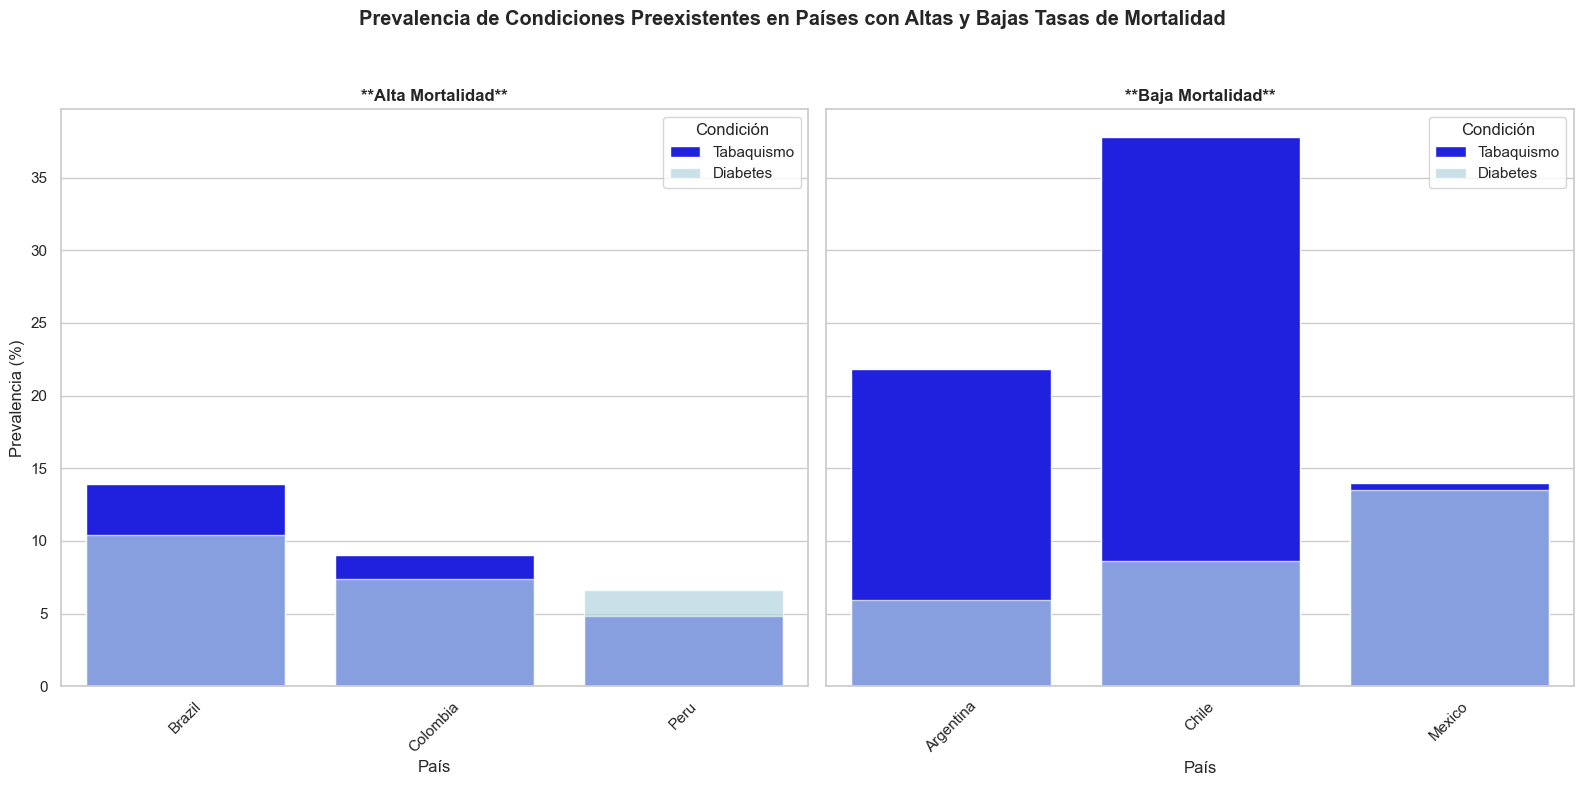

In [89]:
# Calcular la tasa de mortalidad por país
df['mortality_rate'] = df['cumulative_deceased'] / df['cumulative_confirmed'] * 100

# Obtener los últimos datos por país para evitar duplicados
country_data = df.groupby('country_name').last().reset_index()

# Separar países con alta y baja mortalidad usando la mediana
high_mortality_countries = country_data[country_data['mortality_rate'] > country_data['mortality_rate'].median()]
low_mortality_countries = country_data[country_data['mortality_rate'] <= country_data['mortality_rate'].median()]

# Condiciones preexistentes
conditions = ['smoking_prevalence', 'diabetes_prevalence']

# Crear la figura y los ejes para mostrar los países
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Gráfico para países con alta mortalidad
sns.barplot(data=high_mortality_countries, x='country_name', y='smoking_prevalence', color="blue", ax=ax[0], label="Tabaquismo")
sns.barplot(data=high_mortality_countries, x='country_name', y='diabetes_prevalence', color="lightblue", ax=ax[0], label="Diabetes", alpha=0.7)
ax[0].set_title('**Alta Mortalidad**', fontweight='bold')  # Título en negrita
ax[0].set_xlabel('País')
ax[0].set_ylabel('Prevalencia (%)')
ax[0].legend(title='Condición')
ax[0].tick_params(axis='x', rotation=45)

# Gráfico para países con baja mortalidad
sns.barplot(data=low_mortality_countries, x='country_name', y='smoking_prevalence', color="blue", ax=ax[1], label="Tabaquismo")
sns.barplot(data=low_mortality_countries, x='country_name', y='diabetes_prevalence', color="lightblue", ax=ax[1], label="Diabetes", alpha=0.7)
ax[1].set_title('**Baja Mortalidad**', fontweight='bold')  # Título en negrita
ax[1].set_xlabel('País')
ax[1].legend(title='Condición')
ax[1].tick_params(axis='x', rotation=45)

plt.suptitle('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad', fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

El gráfico muestra que los países con alta mortalidad (Colombia, México y Perú) tienen una prevalencia más baja de tabaquismo y diabetes en comparación con los países con baja mortalidad (Argentina, Brasil y Chile). Sin embargo, la prevalencia de tabaquismo es significativamente mayor en los países con baja mortalidad, especialmente en Chile.

### 3.2 Extra Credit

In [90]:
import folium
from folium.plugins import HeatMap

columns=['latitude', 'longitude', 'cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered','cumulative_recovered']
data_map= df[columns].dropna()

#Creamos un mapa centrado en América Latina
map= folium.Map(location=[-14.235004,-51.92527], zoom_start=3)

#Creamos un mapa de calor para los casos confirmados
heat_map_confirmed= HeatMap(data=data_map[['latitude','longitude','cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

#Creamos un mapa de calor para las muertes
heat_map_deceased= HeatMap(data=data_map[['latitude','longitude','cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

#Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine= HeatMap(data=data_map[['latitude','longitude','cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

#Creamos un mapa de calor para los recuperados
heat_map_recovered= HeatMap(data=data_map[['latitude','longitude','cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

In [91]:
# Establecer la columna 'date' como índice sin eliminarla como columna

df.set_index('date', inplace=True, drop=False)

# Mostrar el DataFrame resultante

print(df)

           location_key       date country_code country_name  new_confirmed  \
date                                                                          
2021-01-01           AR 2021-01-01           AR    Argentina       2,685.00   
2021-01-02           AR 2021-01-02           AR    Argentina       7,767.00   
2021-01-03           AR 2021-01-03           AR    Argentina       4,934.00   
2021-01-04           AR 2021-01-04           AR    Argentina      13,953.00   
2021-01-05           AR 2021-01-05           AR    Argentina      14,085.00   
...                 ...        ...          ...          ...            ...   
2022-09-13           PE 2022-09-13           PE         Peru       1,150.00   
2022-09-14           PE 2022-09-14           PE         Peru       5,025.25   
2022-09-15           PE 2022-09-15           PE         Peru       5,025.25   
2022-09-16           PE 2022-09-16           PE         Peru       5,025.25   
2022-09-17           PE 2022-09-17           PE     

In [92]:
# Guardar los datos filtrados en un archivo CSV

df.to_csv('DatosFinalesFiltrado.csv', index=False)

print("Los datos filtrados se han guardado en 'DatosFinalesFiltrado.csv'.")

Los datos filtrados se han guardado en 'DatosFinalesFiltrado.csv'.
